# PID 13:A Vision-Based System for Detection of Road-Lane Curvature

In [1]:
#importing libraries
import numpy as np
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
folder1 = r"C:\Users\rachn\OneDrive\Documents\COLLEGE\Third Year\computer vision\Positives"
folder2 = r"C:\Users\rachn\OneDrive\Documents\COLLEGE\Third Year\computer vision\Negatives"

# **Functions for standardization and normalization**

In [3]:
def standard(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    ans=[]
    for i in data:
        s = (i-mean)/std_dev
        ans.append(s)
    return ans


```

# **Image** **Preprocessing**

In [5]:
i=0
for filename in os.listdir(folder1):
    
    path=os.path.join(folder1,filename)    
    img = cv2.imread(path, 0)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((5,5),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernelx = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])
    kernely = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])

    img_sobelx = cv2.filter2D(img1, -1, kernelx)
    img_sobely = cv2.filter2D(img1, -1, kernely)

    grad = cv2.addWeighted(img_sobelx, 1, img_sobely, 1, 0)
    
    fname = r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/P_POS/' + str(i) + '.jpg'
    cv2.imwrite(fname, grad)
    i+=1

In [8]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename) 
    img = cv2.imread(path, 0)
    
    resize=(800,500)
    img=cv2.resize(img,resize)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((5,5),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    kernelx = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])
    kernely = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])

    img_sobelx = cv2.filter2D(img1, -1, kernelx)
    img_sobely = cv2.filter2D(img1, -1, kernely)

    grad = cv2.addWeighted(img_sobelx, 1, img_sobely, 1, 0)
    
    fname = r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/P_NEG/' + str(i) + '.jpg'
    cv2.imwrite(fname, grad)
    i+=1

In [9]:
folder3 = r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/P_POS/"
folder4 = r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/P_NEG/"

# **Feature Extraction using ORB**

In [19]:
i=0
for filename in os.listdir(folder3):
    
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(800,500)
    img=cv2.resize(a,resize)
        
    #initialise orb descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    
    #descriptors = normal(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/orb_p.csv', mode='a', header=False,index=False)

    if i>=2001:
        break

descriptor shape  0  :  (500, 32)
descriptor shape  1  :  (500, 32)
descriptor shape  2  :  (500, 32)
descriptor shape  3  :  (500, 32)
descriptor shape  4  :  (493, 32)
descriptor shape  5  :  (500, 32)
descriptor shape  6  :  (500, 32)
descriptor shape  7  :  (500, 32)
descriptor shape  8  :  (500, 32)
descriptor shape  9  :  (500, 32)
descriptor shape  10  :  (500, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (500, 32)
descriptor shape  14  :  (500, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (494, 32)
descriptor shape  18  :  (500, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (500, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (491, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500,

descriptor shape  232  :  (500, 32)
descriptor shape  233  :  (500, 32)
descriptor shape  234  :  (500, 32)
descriptor shape  235  :  (500, 32)
descriptor shape  236  :  (500, 32)
descriptor shape  237  :  (500, 32)
descriptor shape  238  :  (500, 32)
descriptor shape  239  :  (500, 32)
descriptor shape  240  :  (500, 32)
descriptor shape  241  :  (500, 32)
descriptor shape  242  :  (500, 32)
descriptor shape  243  :  (500, 32)
descriptor shape  244  :  (500, 32)
descriptor shape  245  :  (500, 32)
descriptor shape  246  :  (500, 32)
descriptor shape  247  :  (500, 32)
descriptor shape  248  :  (500, 32)
descriptor shape  249  :  (500, 32)
descriptor shape  250  :  (500, 32)
descriptor shape  251  :  (500, 32)
descriptor shape  252  :  (500, 32)
descriptor shape  253  :  (500, 32)
descriptor shape  254  :  (500, 32)
descriptor shape  255  :  (500, 32)
descriptor shape  256  :  (500, 32)
descriptor shape  257  :  (500, 32)
descriptor shape  258  :  (500, 32)
descriptor shape  259  :  (5

descriptor shape  461  :  (500, 32)
descriptor shape  462  :  (500, 32)
descriptor shape  463  :  (500, 32)
descriptor shape  464  :  (500, 32)
descriptor shape  465  :  (500, 32)
descriptor shape  466  :  (500, 32)
descriptor shape  467  :  (500, 32)
descriptor shape  468  :  (500, 32)
descriptor shape  469  :  (500, 32)
descriptor shape  470  :  (500, 32)
descriptor shape  471  :  (500, 32)
descriptor shape  472  :  (500, 32)
descriptor shape  473  :  (500, 32)
descriptor shape  474  :  (500, 32)
descriptor shape  475  :  (500, 32)
descriptor shape  476  :  (500, 32)
descriptor shape  477  :  (500, 32)
descriptor shape  478  :  (500, 32)
descriptor shape  479  :  (500, 32)
descriptor shape  480  :  (500, 32)
descriptor shape  481  :  (500, 32)
descriptor shape  482  :  (500, 32)
descriptor shape  483  :  (500, 32)
descriptor shape  484  :  (500, 32)
descriptor shape  485  :  (500, 32)
descriptor shape  486  :  (500, 32)
descriptor shape  487  :  (500, 32)
descriptor shape  488  :  (5

descriptor shape  692  :  (500, 32)
descriptor shape  693  :  (500, 32)
descriptor shape  694  :  (472, 32)
descriptor shape  695  :  (500, 32)
descriptor shape  696  :  (500, 32)
descriptor shape  697  :  (500, 32)
descriptor shape  698  :  (500, 32)
descriptor shape  699  :  (500, 32)
descriptor shape  700  :  (500, 32)
descriptor shape  701  :  (500, 32)
descriptor shape  702  :  (500, 32)
descriptor shape  703  :  (500, 32)
descriptor shape  704  :  (500, 32)
descriptor shape  705  :  (500, 32)
descriptor shape  706  :  (500, 32)
descriptor shape  707  :  (500, 32)
descriptor shape  708  :  (448, 32)
descriptor shape  709  :  (500, 32)
descriptor shape  710  :  (500, 32)
descriptor shape  711  :  (500, 32)
descriptor shape  712  :  (500, 32)
descriptor shape  713  :  (500, 32)
descriptor shape  714  :  (500, 32)
descriptor shape  715  :  (500, 32)
descriptor shape  716  :  (500, 32)
descriptor shape  717  :  (500, 32)
descriptor shape  718  :  (500, 32)
descriptor shape  719  :  (5

descriptor shape  921  :  (500, 32)
descriptor shape  922  :  (500, 32)
descriptor shape  923  :  (500, 32)
descriptor shape  924  :  (500, 32)
descriptor shape  925  :  (500, 32)
descriptor shape  926  :  (500, 32)
descriptor shape  927  :  (500, 32)
descriptor shape  928  :  (500, 32)
descriptor shape  929  :  (500, 32)
descriptor shape  930  :  (500, 32)
descriptor shape  931  :  (500, 32)
descriptor shape  932  :  (500, 32)
descriptor shape  933  :  (500, 32)
descriptor shape  934  :  (500, 32)
descriptor shape  935  :  (443, 32)
descriptor shape  936  :  (500, 32)
descriptor shape  937  :  (175, 32)
descriptor shape  938  :  (500, 32)
descriptor shape  939  :  (500, 32)
descriptor shape  940  :  (500, 32)
descriptor shape  941  :  (500, 32)
descriptor shape  942  :  (500, 32)
descriptor shape  943  :  (500, 32)
descriptor shape  944  :  (500, 32)
descriptor shape  945  :  (500, 32)
descriptor shape  946  :  (500, 32)
descriptor shape  947  :  (500, 32)
descriptor shape  948  :  (5

descriptor shape  1154  :  (500, 32)
descriptor shape  1155  :  (500, 32)
descriptor shape  1156  :  (486, 32)
descriptor shape  1157  :  (482, 32)
descriptor shape  1158  :  (500, 32)
descriptor shape  1159  :  (500, 32)
descriptor shape  1160  :  (500, 32)
descriptor shape  1161  :  (482, 32)
descriptor shape  1162  :  (500, 32)
descriptor shape  1163  :  (500, 32)
descriptor shape  1164  :  (500, 32)
descriptor shape  1165  :  (500, 32)
descriptor shape  1166  :  (500, 32)
descriptor shape  1167  :  (483, 32)
descriptor shape  1168  :  (500, 32)
descriptor shape  1169  :  (500, 32)
descriptor shape  1170  :  (500, 32)
descriptor shape  1171  :  (500, 32)
descriptor shape  1172  :  (500, 32)
descriptor shape  1173  :  (499, 32)
descriptor shape  1174  :  (500, 32)
descriptor shape  1175  :  (500, 32)
descriptor shape  1176  :  (500, 32)
descriptor shape  1177  :  (500, 32)
descriptor shape  1178  :  (490, 32)
descriptor shape  1179  :  (500, 32)
descriptor shape  1180  :  (500, 32)
d

descriptor shape  1376  :  (500, 32)
descriptor shape  1377  :  (500, 32)
descriptor shape  1378  :  (500, 32)
descriptor shape  1379  :  (500, 32)
descriptor shape  1380  :  (477, 32)
descriptor shape  1381  :  (500, 32)
descriptor shape  1382  :  (500, 32)
descriptor shape  1383  :  (500, 32)
descriptor shape  1384  :  (500, 32)
descriptor shape  1385  :  (500, 32)
descriptor shape  1386  :  (500, 32)
descriptor shape  1387  :  (500, 32)
descriptor shape  1388  :  (500, 32)
descriptor shape  1389  :  (500, 32)
descriptor shape  1390  :  (500, 32)
descriptor shape  1391  :  (500, 32)
descriptor shape  1392  :  (500, 32)
descriptor shape  1393  :  (500, 32)
descriptor shape  1394  :  (500, 32)
descriptor shape  1395  :  (500, 32)
descriptor shape  1396  :  (490, 32)
descriptor shape  1397  :  (500, 32)
descriptor shape  1398  :  (500, 32)
descriptor shape  1399  :  (500, 32)
descriptor shape  1400  :  (500, 32)
descriptor shape  1401  :  (500, 32)
descriptor shape  1402  :  (500, 32)
d

descriptor shape  1600  :  (500, 32)
descriptor shape  1601  :  (500, 32)
descriptor shape  1602  :  (500, 32)
descriptor shape  1603  :  (500, 32)
descriptor shape  1604  :  (500, 32)
descriptor shape  1605  :  (500, 32)
descriptor shape  1606  :  (500, 32)
descriptor shape  1607  :  (500, 32)
descriptor shape  1608  :  (500, 32)
descriptor shape  1609  :  (500, 32)
descriptor shape  1610  :  (500, 32)
descriptor shape  1611  :  (500, 32)
descriptor shape  1612  :  (500, 32)
descriptor shape  1613  :  (500, 32)
descriptor shape  1614  :  (500, 32)
descriptor shape  1615  :  (500, 32)
descriptor shape  1616  :  (500, 32)
descriptor shape  1617  :  (454, 32)
descriptor shape  1618  :  (500, 32)
descriptor shape  1619  :  (500, 32)
descriptor shape  1620  :  (500, 32)
descriptor shape  1621  :  (500, 32)
descriptor shape  1622  :  (500, 32)
descriptor shape  1623  :  (488, 32)
descriptor shape  1624  :  (500, 32)
descriptor shape  1625  :  (500, 32)
descriptor shape  1626  :  (500, 32)
d

descriptor shape  1823  :  (500, 32)
descriptor shape  1824  :  (500, 32)
descriptor shape  1825  :  (500, 32)
descriptor shape  1826  :  (500, 32)
descriptor shape  1827  :  (500, 32)
descriptor shape  1828  :  (500, 32)
descriptor shape  1829  :  (500, 32)
descriptor shape  1830  :  (500, 32)
descriptor shape  1831  :  (500, 32)
descriptor shape  1832  :  (500, 32)
descriptor shape  1833  :  (500, 32)
descriptor shape  1834  :  (500, 32)
descriptor shape  1835  :  (500, 32)
descriptor shape  1836  :  (500, 32)
descriptor shape  1837  :  (500, 32)
descriptor shape  1838  :  (500, 32)
descriptor shape  1839  :  (500, 32)
descriptor shape  1840  :  (497, 32)
descriptor shape  1841  :  (500, 32)
descriptor shape  1842  :  (500, 32)
descriptor shape  1843  :  (500, 32)
descriptor shape  1844  :  (500, 32)
descriptor shape  1845  :  (457, 32)
descriptor shape  1846  :  (500, 32)
descriptor shape  1847  :  (500, 32)
descriptor shape  1848  :  (500, 32)
descriptor shape  1849  :  (500, 32)
d

In [20]:
data1= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/orb_p.csv',header=None,dtype='float64')
data1=data1.astype(np.float64)
data1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,215.0,9.0,110.0,113.0,147.0,214.0,251.0,2.0,117.0,229.0,...,53.0,236.0,211.0,251.0,203.0,67.0,103.0,165.0,231.0,100.0
1,198.0,104.0,170.0,220.0,11.0,116.0,142.0,138.0,170.0,154.0,...,218.0,97.0,209.0,38.0,203.0,57.0,136.0,113.0,3.0,54.0
2,19.0,237.0,149.0,63.0,75.0,237.0,53.0,231.0,187.0,115.0,...,186.0,121.0,181.0,242.0,93.0,58.0,114.0,118.0,131.0,238.0
3,161.0,163.0,234.0,51.0,208.0,192.0,187.0,7.0,250.0,77.0,...,228.0,103.0,108.0,172.0,190.0,225.0,129.0,0.0,231.0,194.0
4,242.0,245.0,41.0,46.0,142.0,13.0,22.0,205.0,7.0,42.0,...,203.0,51.0,177.0,0.0,169.0,190.0,121.0,90.0,146.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994932,125.0,53.0,57.0,100.0,185.0,95.0,87.0,57.0,97.0,232.0,...,249.0,12.0,251.0,221.0,37.0,52.0,98.0,254.0,74.0,119.0
994933,96.0,243.0,181.0,64.0,221.0,79.0,65.0,221.0,67.0,61.0,...,235.0,213.0,93.0,18.0,245.0,252.0,115.0,8.0,198.0,163.0
994934,137.0,89.0,28.0,120.0,49.0,141.0,84.0,7.0,255.0,72.0,...,18.0,21.0,198.0,217.0,17.0,58.0,90.0,152.0,73.0,31.0
994935,90.0,139.0,7.0,176.0,211.0,195.0,58.0,34.0,180.0,100.0,...,0.0,61.0,223.0,34.0,234.0,193.0,32.0,5.0,36.0,83.0


In [21]:
i=0
for filename in os.listdir(folder4):
    
    path=os.path.join(folder4,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(800,500)
    img=cv2.resize(a,resize)
        
    #initialise orb descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    # descriptors = normal(descriptors)

    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/orb_n.csv', mode='a', header=False,index=False)

    if i>=2001:
        break

descriptor shape  0  :  (447, 32)
descriptor shape  1  :  (391, 32)
descriptor shape  2  :  (500, 32)
descriptor shape  3  :  (482, 32)
descriptor shape  4  :  (492, 32)
descriptor shape  5  :  (500, 32)
descriptor shape  6  :  (500, 32)
descriptor shape  7  :  (500, 32)
descriptor shape  8  :  (500, 32)
descriptor shape  9  :  (495, 32)
descriptor shape  10  :  (500, 32)
descriptor shape  11  :  (403, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (487, 32)
descriptor shape  14  :  (494, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (487, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (498, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (496, 32)
descriptor shape  22  :  (497, 32)
descriptor shape  23  :  (471, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (489, 32)
descriptor shape  28  :  (500,

descriptor shape  240  :  (500, 32)
descriptor shape  241  :  (473, 32)
descriptor shape  242  :  (493, 32)
descriptor shape  243  :  (500, 32)
descriptor shape  244  :  (500, 32)
descriptor shape  245  :  (392, 32)
descriptor shape  246  :  (500, 32)
descriptor shape  247  :  (496, 32)
descriptor shape  248  :  (497, 32)
descriptor shape  249  :  (500, 32)
descriptor shape  250  :  (474, 32)
descriptor shape  251  :  (500, 32)
descriptor shape  252  :  (491, 32)
descriptor shape  253  :  (484, 32)
descriptor shape  254  :  (500, 32)
descriptor shape  255  :  (463, 32)
descriptor shape  256  :  (500, 32)
descriptor shape  257  :  (500, 32)
descriptor shape  258  :  (497, 32)
descriptor shape  259  :  (500, 32)
descriptor shape  260  :  (441, 32)
descriptor shape  261  :  (500, 32)
descriptor shape  262  :  (484, 32)
descriptor shape  263  :  (500, 32)
descriptor shape  264  :  (465, 32)
descriptor shape  265  :  (498, 32)
descriptor shape  266  :  (500, 32)
descriptor shape  267  :  (5

descriptor shape  469  :  (21, 32)
descriptor shape  470  :  (465, 32)
descriptor shape  471  :  (500, 32)
descriptor shape  472  :  (413, 32)
descriptor shape  473  :  (492, 32)
descriptor shape  474  :  (500, 32)
descriptor shape  475  :  (500, 32)
descriptor shape  476  :  (492, 32)
descriptor shape  477  :  (497, 32)
descriptor shape  478  :  (500, 32)
descriptor shape  479  :  (500, 32)
descriptor shape  480  :  (500, 32)
descriptor shape  481  :  (500, 32)
descriptor shape  482  :  (500, 32)
descriptor shape  483  :  (465, 32)
descriptor shape  484  :  (491, 32)
descriptor shape  485  :  (199, 32)
descriptor shape  486  :  (493, 32)
descriptor shape  487  :  (500, 32)
descriptor shape  488  :  (500, 32)
descriptor shape  489  :  (500, 32)
descriptor shape  490  :  (496, 32)
descriptor shape  491  :  (500, 32)
descriptor shape  492  :  (489, 32)
descriptor shape  493  :  (456, 32)
descriptor shape  494  :  (454, 32)
descriptor shape  495  :  (500, 32)
descriptor shape  496  :  (50

descriptor shape  697  :  (500, 32)
descriptor shape  698  :  (500, 32)
descriptor shape  699  :  (494, 32)
descriptor shape  700  :  (500, 32)
descriptor shape  701  :  (500, 32)
descriptor shape  702  :  (493, 32)
descriptor shape  703  :  (500, 32)
descriptor shape  704  :  (475, 32)
descriptor shape  705  :  (496, 32)
descriptor shape  706  :  (500, 32)
descriptor shape  707  :  (500, 32)
descriptor shape  708  :  (500, 32)
descriptor shape  709  :  (475, 32)
descriptor shape  710  :  (500, 32)
descriptor shape  711  :  (500, 32)
descriptor shape  712  :  (500, 32)
descriptor shape  713  :  (500, 32)
descriptor shape  714  :  (500, 32)
descriptor shape  715  :  (468, 32)
descriptor shape  716  :  (500, 32)
descriptor shape  717  :  (500, 32)
descriptor shape  718  :  (500, 32)
descriptor shape  719  :  (500, 32)
descriptor shape  720  :  (500, 32)
descriptor shape  721  :  (500, 32)
descriptor shape  722  :  (482, 32)
descriptor shape  723  :  (500, 32)
descriptor shape  724  :  (5

descriptor shape  926  :  (500, 32)
descriptor shape  927  :  (491, 32)
descriptor shape  928  :  (465, 32)
descriptor shape  929  :  (489, 32)
descriptor shape  930  :  (500, 32)
descriptor shape  931  :  (500, 32)
descriptor shape  932  :  (458, 32)
descriptor shape  933  :  (496, 32)
descriptor shape  934  :  (500, 32)
descriptor shape  935  :  (500, 32)
descriptor shape  936  :  (500, 32)
descriptor shape  937  :  (500, 32)
descriptor shape  938  :  (500, 32)
descriptor shape  939  :  (500, 32)
descriptor shape  940  :  (500, 32)
descriptor shape  941  :  (500, 32)
descriptor shape  942  :  (465, 32)
descriptor shape  943  :  (500, 32)
descriptor shape  944  :  (500, 32)
descriptor shape  945  :  (472, 32)
descriptor shape  946  :  (500, 32)
descriptor shape  947  :  (478, 32)
descriptor shape  948  :  (490, 32)
descriptor shape  949  :  (492, 32)
descriptor shape  950  :  (199, 32)
descriptor shape  951  :  (500, 32)
descriptor shape  952  :  (489, 32)
descriptor shape  953  :  (4

descriptor shape  1152  :  (493, 32)
descriptor shape  1153  :  (500, 32)
descriptor shape  1154  :  (500, 32)
descriptor shape  1155  :  (459, 32)
descriptor shape  1156  :  (499, 32)
descriptor shape  1157  :  (500, 32)
descriptor shape  1158  :  (500, 32)
descriptor shape  1159  :  (495, 32)
descriptor shape  1160  :  (493, 32)
descriptor shape  1161  :  (500, 32)
descriptor shape  1162  :  (500, 32)
descriptor shape  1163  :  (500, 32)
descriptor shape  1164  :  (332, 32)
descriptor shape  1165  :  (461, 32)
descriptor shape  1166  :  (500, 32)
descriptor shape  1167  :  (467, 32)
descriptor shape  1168  :  (500, 32)
descriptor shape  1169  :  (500, 32)
descriptor shape  1170  :  (460, 32)
descriptor shape  1171  :  (500, 32)
descriptor shape  1172  :  (462, 32)
descriptor shape  1173  :  (500, 32)
descriptor shape  1174  :  (478, 32)
descriptor shape  1175  :  (474, 32)
descriptor shape  1176  :  (459, 32)
descriptor shape  1177  :  (500, 32)
descriptor shape  1178  :  (500, 32)
d

descriptor shape  1376  :  (500, 32)
descriptor shape  1377  :  (494, 32)
descriptor shape  1378  :  (500, 32)
descriptor shape  1379  :  (500, 32)
descriptor shape  1380  :  (500, 32)
descriptor shape  1381  :  (500, 32)
descriptor shape  1382  :  (499, 32)
descriptor shape  1383  :  (491, 32)
descriptor shape  1384  :  (497, 32)
descriptor shape  1385  :  (473, 32)
descriptor shape  1386  :  (500, 32)
descriptor shape  1387  :  (427, 32)
descriptor shape  1388  :  (500, 32)
descriptor shape  1389  :  (500, 32)
descriptor shape  1390  :  (447, 32)
descriptor shape  1391  :  (500, 32)
descriptor shape  1392  :  (447, 32)
descriptor shape  1393  :  (500, 32)
descriptor shape  1394  :  (500, 32)
descriptor shape  1395  :  (500, 32)
descriptor shape  1396  :  (453, 32)
descriptor shape  1397  :  (500, 32)
descriptor shape  1398  :  (500, 32)
descriptor shape  1399  :  (479, 32)
descriptor shape  1400  :  (500, 32)
descriptor shape  1401  :  (487, 32)
descriptor shape  1402  :  (500, 32)
d

descriptor shape  1598  :  (301, 32)
descriptor shape  1599  :  (500, 32)
descriptor shape  1600  :  (461, 32)
descriptor shape  1601  :  (500, 32)
descriptor shape  1602  :  (484, 32)
descriptor shape  1603  :  (493, 32)
descriptor shape  1604  :  (500, 32)
descriptor shape  1605  :  (424, 32)
descriptor shape  1606  :  (489, 32)
descriptor shape  1607  :  (500, 32)
descriptor shape  1608  :  (500, 32)
descriptor shape  1609  :  (500, 32)
descriptor shape  1610  :  (490, 32)
descriptor shape  1611  :  (488, 32)
descriptor shape  1612  :  (454, 32)
descriptor shape  1613  :  (475, 32)
descriptor shape  1614  :  (500, 32)
descriptor shape  1615  :  (498, 32)
descriptor shape  1616  :  (491, 32)
descriptor shape  1617  :  (495, 32)
descriptor shape  1618  :  (500, 32)
descriptor shape  1619  :  (500, 32)
descriptor shape  1620  :  (500, 32)
descriptor shape  1621  :  (463, 32)
descriptor shape  1622  :  (500, 32)
descriptor shape  1623  :  (480, 32)
descriptor shape  1624  :  (489, 32)
d

descriptor shape  1824  :  (434, 32)
descriptor shape  1825  :  (500, 32)
descriptor shape  1826  :  (500, 32)
descriptor shape  1827  :  (500, 32)
descriptor shape  1828  :  (500, 32)
descriptor shape  1829  :  (500, 32)
descriptor shape  1830  :  (500, 32)
descriptor shape  1831  :  (500, 32)
descriptor shape  1832  :  (491, 32)
descriptor shape  1833  :  (500, 32)
descriptor shape  1834  :  (447, 32)
descriptor shape  1835  :  (500, 32)
descriptor shape  1836  :  (494, 32)
descriptor shape  1837  :  (464, 32)
descriptor shape  1838  :  (492, 32)
descriptor shape  1839  :  (500, 32)
descriptor shape  1840  :  (500, 32)
descriptor shape  1841  :  (500, 32)
descriptor shape  1842  :  (500, 32)
descriptor shape  1843  :  (479, 32)
descriptor shape  1844  :  (500, 32)
descriptor shape  1845  :  (500, 32)
descriptor shape  1846  :  (470, 32)
descriptor shape  1847  :  (487, 32)
descriptor shape  1848  :  (487, 32)
descriptor shape  1849  :  (473, 32)
descriptor shape  1850  :  (471, 32)
d

In [22]:
data2= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/orb_n.csv',header=None,dtype ='float64')
data2=data2.astype(np.float64)
data2

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,242.0,6.0,124.0,76.0,50.0,27.0,144.0,47.0,21.0,163.0,...,65.0,30.0,90.0,254.0,80.0,147.0,247.0,172.0,74.0,15.0
1,32.0,150.0,66.0,55.0,48.0,186.0,98.0,51.0,61.0,65.0,...,85.0,47.0,166.0,246.0,16.0,80.0,202.0,143.0,70.0,92.0
2,32.0,50.0,159.0,120.0,73.0,239.0,144.0,78.0,214.0,185.0,...,219.0,17.0,29.0,131.0,49.0,63.0,209.0,8.0,70.0,171.0
3,57.0,26.0,118.0,123.0,21.0,222.0,97.0,20.0,85.0,45.0,...,101.0,45.0,134.0,235.0,112.0,67.0,115.0,141.0,116.0,109.0
4,66.0,187.0,24.0,44.0,88.0,141.0,16.0,88.0,142.0,220.0,...,218.0,89.0,208.0,17.0,41.0,187.0,88.0,34.0,15.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962855,198.0,190.0,144.0,186.0,169.0,189.0,20.0,139.0,171.0,31.0,...,218.0,243.0,136.0,208.0,77.0,251.0,152.0,103.0,143.0,23.0
962856,95.0,178.0,148.0,177.0,171.0,60.0,56.0,159.0,171.0,249.0,...,163.0,192.0,158.0,211.0,127.0,247.0,174.0,68.0,139.0,87.0
962857,232.0,184.0,152.0,48.0,171.0,249.0,16.0,159.0,171.0,125.0,...,218.0,49.0,202.0,209.0,53.0,255.0,250.0,68.0,143.0,91.0
962858,96.0,29.0,101.0,76.0,217.0,74.0,134.0,34.0,32.0,64.0,...,85.0,15.0,49.0,39.0,136.0,16.0,109.0,38.0,246.0,114.0


In [23]:
ORB_data=data1.append(data2)

In [24]:
csv_data=ORB_data.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/orb_f.csv', mode='a', header=False,index=False)

In [25]:
ORB_data = pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/orb_f.csv',header=None)

In [26]:
ORB_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,215.0,9.0,110.0,113.0,147.0,214.0,251.0,2.0,117.0,229.0,...,53.0,236.0,211.0,251.0,203.0,67.0,103.0,165.0,231.0,100.0
1,198.0,104.0,170.0,220.0,11.0,116.0,142.0,138.0,170.0,154.0,...,218.0,97.0,209.0,38.0,203.0,57.0,136.0,113.0,3.0,54.0
2,19.0,237.0,149.0,63.0,75.0,237.0,53.0,231.0,187.0,115.0,...,186.0,121.0,181.0,242.0,93.0,58.0,114.0,118.0,131.0,238.0
3,161.0,163.0,234.0,51.0,208.0,192.0,187.0,7.0,250.0,77.0,...,228.0,103.0,108.0,172.0,190.0,225.0,129.0,0.0,231.0,194.0
4,242.0,245.0,41.0,46.0,142.0,13.0,22.0,205.0,7.0,42.0,...,203.0,51.0,177.0,0.0,169.0,190.0,121.0,90.0,146.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957792,198.0,190.0,144.0,186.0,169.0,189.0,20.0,139.0,171.0,31.0,...,218.0,243.0,136.0,208.0,77.0,251.0,152.0,103.0,143.0,23.0
1957793,95.0,178.0,148.0,177.0,171.0,60.0,56.0,159.0,171.0,249.0,...,163.0,192.0,158.0,211.0,127.0,247.0,174.0,68.0,139.0,87.0
1957794,232.0,184.0,152.0,48.0,171.0,249.0,16.0,159.0,171.0,125.0,...,218.0,49.0,202.0,209.0,53.0,255.0,250.0,68.0,143.0,91.0
1957795,96.0,29.0,101.0,76.0,217.0,74.0,134.0,34.0,32.0,64.0,...,85.0,15.0,49.0,39.0,136.0,16.0,109.0,38.0,246.0,114.0


# Feature Extraction using SURF

In [11]:
i=0
for filename in os.listdir(folder3):
    
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(800,500)
    img=cv2.resize(a,resize)
        
    #initialise surf descriptor
    surf = cv2.xfeatures2d.SURF_create(800)
    keypoints, descriptors = surf.detectAndCompute(img, None)
    
    #descriptors = normal(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/surf_p.csv', mode='a', header=False,index=False)

    if i>=2001:
        break

descriptor shape  0  :  (1431, 64)
descriptor shape  1  :  (1164, 64)
descriptor shape  2  :  (1141, 64)
descriptor shape  3  :  (382, 64)
descriptor shape  4  :  (459, 64)
descriptor shape  5  :  (1056, 64)
descriptor shape  6  :  (1291, 64)
descriptor shape  7  :  (688, 64)
descriptor shape  8  :  (1450, 64)
descriptor shape  9  :  (1927, 64)
descriptor shape  10  :  (2159, 64)
descriptor shape  11  :  (1215, 64)
descriptor shape  12  :  (734, 64)
descriptor shape  13  :  (798, 64)
descriptor shape  14  :  (843, 64)
descriptor shape  15  :  (1380, 64)
descriptor shape  16  :  (417, 64)
descriptor shape  17  :  (674, 64)
descriptor shape  18  :  (2149, 64)
descriptor shape  19  :  (496, 64)
descriptor shape  20  :  (2522, 64)
descriptor shape  21  :  (621, 64)
descriptor shape  22  :  (729, 64)
descriptor shape  23  :  (516, 64)
descriptor shape  24  :  (3439, 64)
descriptor shape  25  :  (619, 64)
descriptor shape  26  :  (611, 64)
descriptor shape  27  :  (923, 64)
descriptor shape 

descriptor shape  228  :  (1242, 64)
descriptor shape  229  :  (1050, 64)
descriptor shape  230  :  (2706, 64)
descriptor shape  231  :  (439, 64)
descriptor shape  232  :  (1475, 64)
descriptor shape  233  :  (1245, 64)
descriptor shape  234  :  (652, 64)
descriptor shape  235  :  (765, 64)
descriptor shape  236  :  (758, 64)
descriptor shape  237  :  (2428, 64)
descriptor shape  238  :  (1854, 64)
descriptor shape  239  :  (1044, 64)
descriptor shape  240  :  (594, 64)
descriptor shape  241  :  (1853, 64)
descriptor shape  242  :  (280, 64)
descriptor shape  243  :  (1297, 64)
descriptor shape  244  :  (1314, 64)
descriptor shape  245  :  (910, 64)
descriptor shape  246  :  (890, 64)
descriptor shape  247  :  (780, 64)
descriptor shape  248  :  (1006, 64)
descriptor shape  249  :  (2002, 64)
descriptor shape  250  :  (1629, 64)
descriptor shape  251  :  (1382, 64)
descriptor shape  252  :  (559, 64)
descriptor shape  253  :  (668, 64)
descriptor shape  254  :  (126, 64)
descriptor sh

descriptor shape  454  :  (1588, 64)
descriptor shape  455  :  (859, 64)
descriptor shape  456  :  (1457, 64)
descriptor shape  457  :  (1193, 64)
descriptor shape  458  :  (769, 64)
descriptor shape  459  :  (1113, 64)
descriptor shape  460  :  (1162, 64)
descriptor shape  461  :  (775, 64)
descriptor shape  462  :  (1446, 64)
descriptor shape  463  :  (2116, 64)
descriptor shape  464  :  (2140, 64)
descriptor shape  465  :  (1065, 64)
descriptor shape  466  :  (1205, 64)
descriptor shape  467  :  (1048, 64)
descriptor shape  468  :  (291, 64)
descriptor shape  469  :  (1000, 64)
descriptor shape  470  :  (1468, 64)
descriptor shape  471  :  (1085, 64)
descriptor shape  472  :  (1478, 64)
descriptor shape  473  :  (1160, 64)
descriptor shape  474  :  (1447, 64)
descriptor shape  475  :  (1791, 64)
descriptor shape  476  :  (2324, 64)
descriptor shape  477  :  (2121, 64)
descriptor shape  478  :  (719, 64)
descriptor shape  479  :  (1101, 64)
descriptor shape  480  :  (692, 64)
descrip

descriptor shape  680  :  (556, 64)
descriptor shape  681  :  (1970, 64)
descriptor shape  682  :  (1789, 64)
descriptor shape  683  :  (1129, 64)
descriptor shape  684  :  (1300, 64)
descriptor shape  685  :  (476, 64)
descriptor shape  686  :  (1253, 64)
descriptor shape  687  :  (1234, 64)
descriptor shape  688  :  (152, 64)
descriptor shape  689  :  (578, 64)
descriptor shape  690  :  (980, 64)
descriptor shape  691  :  (1139, 64)
descriptor shape  692  :  (1400, 64)
descriptor shape  693  :  (1734, 64)
descriptor shape  694  :  (550, 64)
descriptor shape  695  :  (338, 64)
descriptor shape  696  :  (617, 64)
descriptor shape  697  :  (780, 64)
descriptor shape  698  :  (702, 64)
descriptor shape  699  :  (293, 64)
descriptor shape  700  :  (321, 64)
descriptor shape  701  :  (602, 64)
descriptor shape  702  :  (427, 64)
descriptor shape  703  :  (875, 64)
descriptor shape  704  :  (976, 64)
descriptor shape  705  :  (1134, 64)
descriptor shape  706  :  (696, 64)
descriptor shape  

descriptor shape  906  :  (53, 64)
descriptor shape  907  :  (940, 64)
descriptor shape  908  :  (411, 64)
descriptor shape  909  :  (1717, 64)
descriptor shape  910  :  (750, 64)
descriptor shape  911  :  (1329, 64)
descriptor shape  912  :  (1110, 64)
descriptor shape  913  :  (947, 64)
descriptor shape  914  :  (728, 64)
descriptor shape  915  :  (747, 64)
descriptor shape  916  :  (555, 64)
descriptor shape  917  :  (1595, 64)
descriptor shape  918  :  (1513, 64)
descriptor shape  919  :  (1208, 64)
descriptor shape  920  :  (450, 64)
descriptor shape  921  :  (603, 64)
descriptor shape  922  :  (2191, 64)
descriptor shape  923  :  (784, 64)
descriptor shape  924  :  (451, 64)
descriptor shape  925  :  (1637, 64)
descriptor shape  926  :  (527, 64)
descriptor shape  927  :  (1271, 64)
descriptor shape  928  :  (454, 64)
descriptor shape  929  :  (937, 64)
descriptor shape  930  :  (625, 64)
descriptor shape  931  :  (1233, 64)
descriptor shape  932  :  (1217, 64)
descriptor shape  

descriptor shape  1129  :  (884, 64)
descriptor shape  1130  :  (986, 64)
descriptor shape  1131  :  (193, 64)
descriptor shape  1132  :  (766, 64)
descriptor shape  1133  :  (1151, 64)
descriptor shape  1134  :  (743, 64)
descriptor shape  1135  :  (353, 64)
descriptor shape  1136  :  (236, 64)
descriptor shape  1137  :  (95, 64)
descriptor shape  1138  :  (492, 64)
descriptor shape  1139  :  (2005, 64)
descriptor shape  1140  :  (2103, 64)
descriptor shape  1141  :  (462, 64)
descriptor shape  1142  :  (556, 64)
descriptor shape  1143  :  (401, 64)
descriptor shape  1144  :  (570, 64)
descriptor shape  1145  :  (55, 64)
descriptor shape  1146  :  (891, 64)
descriptor shape  1147  :  (159, 64)
descriptor shape  1148  :  (342, 64)
descriptor shape  1149  :  (514, 64)
descriptor shape  1150  :  (886, 64)
descriptor shape  1151  :  (359, 64)
descriptor shape  1152  :  (1003, 64)
descriptor shape  1153  :  (656, 64)
descriptor shape  1154  :  (1104, 64)
descriptor shape  1155  :  (2053, 6

descriptor shape  1349  :  (2243, 64)
descriptor shape  1350  :  (1062, 64)
descriptor shape  1351  :  (1179, 64)
descriptor shape  1352  :  (1358, 64)
descriptor shape  1353  :  (552, 64)
descriptor shape  1354  :  (753, 64)
descriptor shape  1355  :  (426, 64)
descriptor shape  1356  :  (124, 64)
descriptor shape  1357  :  (1818, 64)
descriptor shape  1358  :  (892, 64)
descriptor shape  1359  :  (379, 64)
descriptor shape  1360  :  (1147, 64)
descriptor shape  1361  :  (489, 64)
descriptor shape  1362  :  (788, 64)
descriptor shape  1363  :  (386, 64)
descriptor shape  1364  :  (927, 64)
descriptor shape  1365  :  (539, 64)
descriptor shape  1366  :  (1267, 64)
descriptor shape  1367  :  (756, 64)
descriptor shape  1368  :  (1683, 64)
descriptor shape  1369  :  (134, 64)
descriptor shape  1370  :  (882, 64)
descriptor shape  1371  :  (1560, 64)
descriptor shape  1372  :  (1030, 64)
descriptor shape  1373  :  (1652, 64)
descriptor shape  1374  :  (384, 64)
descriptor shape  1375  :  

descriptor shape  1568  :  (406, 64)
descriptor shape  1569  :  (739, 64)
descriptor shape  1570  :  (270, 64)
descriptor shape  1571  :  (404, 64)
descriptor shape  1572  :  (830, 64)
descriptor shape  1573  :  (583, 64)
descriptor shape  1574  :  (802, 64)
descriptor shape  1575  :  (843, 64)
descriptor shape  1576  :  (1493, 64)
descriptor shape  1577  :  (1560, 64)
descriptor shape  1578  :  (772, 64)
descriptor shape  1579  :  (649, 64)
descriptor shape  1580  :  (414, 64)
descriptor shape  1581  :  (613, 64)
descriptor shape  1582  :  (1575, 64)
descriptor shape  1583  :  (1834, 64)
descriptor shape  1584  :  (469, 64)
descriptor shape  1585  :  (505, 64)
descriptor shape  1586  :  (660, 64)
descriptor shape  1587  :  (198, 64)
descriptor shape  1588  :  (509, 64)
descriptor shape  1589  :  (1079, 64)
descriptor shape  1590  :  (470, 64)
descriptor shape  1591  :  (1155, 64)
descriptor shape  1592  :  (1362, 64)
descriptor shape  1593  :  (1953, 64)
descriptor shape  1594  :  (13

descriptor shape  1787  :  (488, 64)
descriptor shape  1788  :  (997, 64)
descriptor shape  1789  :  (844, 64)
descriptor shape  1790  :  (1684, 64)
descriptor shape  1791  :  (577, 64)
descriptor shape  1792  :  (705, 64)
descriptor shape  1793  :  (1229, 64)
descriptor shape  1794  :  (445, 64)
descriptor shape  1795  :  (656, 64)
descriptor shape  1796  :  (1632, 64)
descriptor shape  1797  :  (637, 64)
descriptor shape  1798  :  (752, 64)
descriptor shape  1799  :  (1267, 64)
descriptor shape  1800  :  (466, 64)
descriptor shape  1801  :  (607, 64)
descriptor shape  1802  :  (425, 64)
descriptor shape  1803  :  (1147, 64)
descriptor shape  1804  :  (559, 64)
descriptor shape  1805  :  (1895, 64)
descriptor shape  1806  :  (125, 64)
descriptor shape  1807  :  (875, 64)
descriptor shape  1808  :  (381, 64)
descriptor shape  1809  :  (953, 64)
descriptor shape  1810  :  (669, 64)
descriptor shape  1811  :  (843, 64)
descriptor shape  1812  :  (1375, 64)
descriptor shape  1813  :  (120

In [12]:
data3= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/surf_p.csv',header=None, dtype='float64')
data3=data3.astype(np.float64)
data3

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.001164,0.000222,0.001210,0.000305,0.010142,-0.002245,0.017874,0.011404,-0.003901,-0.002520,...,0.045820,0.013081,-0.013531,-0.008778,0.042152,0.012143,0.000483,0.005478,0.004904,0.010722
1,0.007291,-0.000209,0.007395,0.000754,0.032690,0.002694,0.066829,0.005762,-0.049576,-0.002795,...,0.030115,0.042926,0.012769,-0.000990,0.054634,0.013519,-0.003443,0.000525,0.004068,0.001665
2,-0.002183,0.000278,0.005490,0.001482,-0.000327,-0.003046,0.012494,0.009088,0.010691,0.006361,...,0.025630,0.017307,-0.015138,-0.015601,0.027266,0.027450,0.000506,-0.002237,0.002033,0.003297
3,-0.001856,-0.000758,0.003518,0.001072,0.005809,-0.004543,0.007706,0.009722,0.021393,0.002779,...,0.005406,0.018307,0.028663,0.008423,0.053217,0.011726,-0.005969,0.000177,0.012454,0.001646
4,0.000255,0.000545,0.001366,0.001141,-0.001386,0.007532,0.016959,0.019588,0.005881,0.004374,...,0.009571,0.023373,0.013442,0.015959,0.053069,0.019228,0.002364,-0.000759,0.004870,0.001635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044748,-0.000871,-0.000312,0.001318,0.002363,0.020778,-0.000035,0.023377,0.010222,-0.005588,0.002207,...,0.024014,0.023216,-0.017435,-0.006941,0.072880,0.011169,0.002921,-0.000751,0.002993,0.001141
2044749,-0.000217,-0.000510,0.005515,0.002822,-0.033359,-0.000211,0.049059,0.014596,0.016743,0.016475,...,0.014304,0.008708,0.015933,-0.009372,0.029728,0.026486,-0.002795,0.000412,0.003537,0.002842
2044750,0.000284,0.001754,0.002133,0.002315,0.051850,-0.004679,0.071449,0.015473,-0.068704,0.003723,...,0.030337,0.004677,0.012118,0.004094,0.089275,0.010224,-0.000121,0.000164,0.001732,0.001027
2044751,-0.003773,0.000195,0.009732,0.003435,-0.004777,0.003540,0.022156,0.017088,0.033713,-0.010127,...,0.045828,0.068791,0.014889,0.004817,0.034741,0.042473,0.004066,0.001554,0.011171,0.005185


In [13]:
i=0
for filename in os.listdir(folder4):
    
    path=os.path.join(folder4,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(800,500)
    img=cv2.resize(a,resize)
        
    #initialise surf descriptor
    surf = cv2.xfeatures2d.SURF_create(800)
    keypoints, descriptors = surf.detectAndCompute(img, None)
    # descriptors = normal(descriptors)

    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/surf_n.csv', mode='a', header=False,index=False)

    if i>=2001:
        break

descriptor shape  0  :  (574, 64)
descriptor shape  1  :  (83, 64)
descriptor shape  2  :  (1003, 64)
descriptor shape  3  :  (475, 64)
descriptor shape  4  :  (243, 64)
descriptor shape  5  :  (477, 64)
descriptor shape  6  :  (723, 64)
descriptor shape  7  :  (485, 64)
descriptor shape  8  :  (343, 64)
descriptor shape  9  :  (278, 64)
descriptor shape  10  :  (1064, 64)
descriptor shape  11  :  (55, 64)
descriptor shape  12  :  (1317, 64)
descriptor shape  13  :  (752, 64)
descriptor shape  14  :  (903, 64)
descriptor shape  15  :  (440, 64)
descriptor shape  16  :  (98, 64)
descriptor shape  17  :  (1121, 64)
descriptor shape  18  :  (392, 64)
descriptor shape  19  :  (470, 64)
descriptor shape  20  :  (840, 64)
descriptor shape  21  :  (193, 64)
descriptor shape  22  :  (452, 64)
descriptor shape  23  :  (207, 64)
descriptor shape  24  :  (419, 64)
descriptor shape  25  :  (883, 64)
descriptor shape  26  :  (632, 64)
descriptor shape  27  :  (411, 64)
descriptor shape  28  :  (619

descriptor shape  231  :  (758, 64)
descriptor shape  232  :  (218, 64)
descriptor shape  233  :  (1039, 64)
descriptor shape  234  :  (1284, 64)
descriptor shape  235  :  (81, 64)
descriptor shape  236  :  (1157, 64)
descriptor shape  237  :  (309, 64)
descriptor shape  238  :  (496, 64)
descriptor shape  239  :  (1153, 64)
descriptor shape  240  :  (1136, 64)
descriptor shape  241  :  (187, 64)
descriptor shape  242  :  (404, 64)
descriptor shape  243  :  (688, 64)
descriptor shape  244  :  (607, 64)
descriptor shape  245  :  (297, 64)
descriptor shape  246  :  (898, 64)
descriptor shape  247  :  (484, 64)
descriptor shape  248  :  (439, 64)
descriptor shape  249  :  (935, 64)
descriptor shape  250  :  (161, 64)
descriptor shape  251  :  (749, 64)
descriptor shape  252  :  (397, 64)
descriptor shape  253  :  (188, 64)
descriptor shape  254  :  (879, 64)
descriptor shape  255  :  (436, 64)
descriptor shape  256  :  (413, 64)
descriptor shape  257  :  (869, 64)
descriptor shape  258  :

descriptor shape  460  :  (272, 64)
descriptor shape  461  :  (315, 64)
descriptor shape  462  :  (394, 64)
descriptor shape  463  :  (215, 64)
descriptor shape  464  :  (473, 64)
descriptor shape  465  :  (1255, 64)
descriptor shape  466  :  (910, 64)
descriptor shape  467  :  (667, 64)
descriptor shape  468  :  (251, 64)
descriptor shape  469  :  (1, 64)
descriptor shape  470  :  (107, 64)
descriptor shape  471  :  (1108, 64)
descriptor shape  472  :  (147, 64)
descriptor shape  473  :  (367, 64)
descriptor shape  474  :  (645, 64)
descriptor shape  475  :  (1279, 64)
descriptor shape  476  :  (472, 64)
descriptor shape  477  :  (844, 64)
descriptor shape  478  :  (137, 64)
descriptor shape  479  :  (325, 64)
descriptor shape  480  :  (734, 64)
descriptor shape  481  :  (520, 64)
descriptor shape  482  :  (823, 64)
descriptor shape  483  :  (77, 64)
descriptor shape  484  :  (849, 64)
descriptor shape  485  :  (37, 64)
descriptor shape  486  :  (569, 64)
descriptor shape  487  :  (57

descriptor shape  688  :  (62, 64)
descriptor shape  689  :  (239, 64)
descriptor shape  690  :  (119, 64)
descriptor shape  691  :  (187, 64)
descriptor shape  692  :  (245, 64)
descriptor shape  693  :  (110, 64)
descriptor shape  694  :  (639, 64)
descriptor shape  695  :  (1111, 64)
descriptor shape  696  :  (59, 64)
descriptor shape  697  :  (409, 64)
descriptor shape  698  :  (1274, 64)
descriptor shape  699  :  (286, 64)
descriptor shape  700  :  (1051, 64)
descriptor shape  701  :  (210, 64)
descriptor shape  702  :  (404, 64)
descriptor shape  703  :  (1109, 64)
descriptor shape  704  :  (368, 64)
descriptor shape  705  :  (437, 64)
descriptor shape  706  :  (673, 64)
descriptor shape  707  :  (400, 64)
descriptor shape  708  :  (461, 64)
descriptor shape  709  :  (450, 64)
descriptor shape  710  :  (1025, 64)
descriptor shape  711  :  (482, 64)
descriptor shape  712  :  (742, 64)
descriptor shape  713  :  (688, 64)
descriptor shape  714  :  (809, 64)
descriptor shape  715  : 

descriptor shape  916  :  (200, 64)
descriptor shape  917  :  (708, 64)
descriptor shape  918  :  (570, 64)
descriptor shape  919  :  (1826, 64)
descriptor shape  920  :  (738, 64)
descriptor shape  921  :  (835, 64)
descriptor shape  922  :  (231, 64)
descriptor shape  923  :  (310, 64)
descriptor shape  924  :  (280, 64)
descriptor shape  925  :  (371, 64)
descriptor shape  926  :  (1153, 64)
descriptor shape  927  :  (397, 64)
descriptor shape  928  :  (128, 64)
descriptor shape  929  :  (184, 64)
descriptor shape  930  :  (495, 64)
descriptor shape  931  :  (875, 64)
descriptor shape  932  :  (167, 64)
descriptor shape  933  :  (929, 64)
descriptor shape  934  :  (413, 64)
descriptor shape  935  :  (1005, 64)
descriptor shape  936  :  (487, 64)
descriptor shape  937  :  (739, 64)
descriptor shape  938  :  (292, 64)
descriptor shape  939  :  (700, 64)
descriptor shape  940  :  (361, 64)
descriptor shape  941  :  (933, 64)
descriptor shape  942  :  (114, 64)
descriptor shape  943  : 

descriptor shape  1139  :  (403, 64)
descriptor shape  1140  :  (147, 64)
descriptor shape  1141  :  (667, 64)
descriptor shape  1142  :  (990, 64)
descriptor shape  1143  :  (488, 64)
descriptor shape  1144  :  (473, 64)
descriptor shape  1145  :  (344, 64)
descriptor shape  1146  :  (1509, 64)
descriptor shape  1147  :  (466, 64)
descriptor shape  1148  :  (363, 64)
descriptor shape  1149  :  (548, 64)
descriptor shape  1150  :  (1404, 64)
descriptor shape  1151  :  (802, 64)
descriptor shape  1152  :  (567, 64)
descriptor shape  1153  :  (426, 64)
descriptor shape  1154  :  (731, 64)
descriptor shape  1155  :  (547, 64)
descriptor shape  1156  :  (393, 64)
descriptor shape  1157  :  (750, 64)
descriptor shape  1158  :  (829, 64)
descriptor shape  1159  :  (577, 64)
descriptor shape  1160  :  (241, 64)
descriptor shape  1161  :  (619, 64)
descriptor shape  1162  :  (977, 64)
descriptor shape  1163  :  (1570, 64)
descriptor shape  1164  :  (243, 64)
descriptor shape  1165  :  (97, 64)

descriptor shape  1360  :  (594, 64)
descriptor shape  1361  :  (942, 64)
descriptor shape  1362  :  (1557, 64)
descriptor shape  1363  :  (437, 64)
descriptor shape  1364  :  (425, 64)
descriptor shape  1365  :  (1066, 64)
descriptor shape  1366  :  (808, 64)
descriptor shape  1367  :  (1328, 64)
descriptor shape  1368  :  (434, 64)
descriptor shape  1369  :  (265, 64)
descriptor shape  1370  :  (329, 64)
descriptor shape  1371  :  (593, 64)
descriptor shape  1372  :  (393, 64)
descriptor shape  1373  :  (384, 64)
descriptor shape  1374  :  (212, 64)
descriptor shape  1375  :  (987, 64)
descriptor shape  1376  :  (1306, 64)
descriptor shape  1377  :  (447, 64)
descriptor shape  1378  :  (1271, 64)
descriptor shape  1379  :  (2064, 64)
descriptor shape  1380  :  (1749, 64)
descriptor shape  1381  :  (1232, 64)
descriptor shape  1382  :  (321, 64)
descriptor shape  1383  :  (421, 64)
descriptor shape  1384  :  (501, 64)
descriptor shape  1385  :  (173, 64)
descriptor shape  1386  :  (69

descriptor shape  1581  :  (258, 64)
descriptor shape  1582  :  (1070, 64)
descriptor shape  1583  :  (695, 64)
descriptor shape  1584  :  (566, 64)
descriptor shape  1585  :  (1258, 64)
descriptor shape  1586  :  (148, 64)
descriptor shape  1587  :  (337, 64)
descriptor shape  1588  :  (1480, 64)
descriptor shape  1589  :  (165, 64)
descriptor shape  1590  :  (808, 64)
descriptor shape  1591  :  (428, 64)
descriptor shape  1592  :  (949, 64)
descriptor shape  1593  :  (1398, 64)
descriptor shape  1594  :  (933, 64)
descriptor shape  1595  :  (481, 64)
descriptor shape  1596  :  (266, 64)
descriptor shape  1597  :  (97, 64)
descriptor shape  1598  :  (80, 64)
descriptor shape  1599  :  (726, 64)
descriptor shape  1600  :  (620, 64)
descriptor shape  1601  :  (1328, 64)
descriptor shape  1602  :  (329, 64)
descriptor shape  1603  :  (542, 64)
descriptor shape  1604  :  (647, 64)
descriptor shape  1605  :  (198, 64)
descriptor shape  1606  :  (433, 64)
descriptor shape  1607  :  (1073, 6

descriptor shape  1803  :  (137, 64)
descriptor shape  1804  :  (737, 64)
descriptor shape  1805  :  (922, 64)
descriptor shape  1806  :  (468, 64)
descriptor shape  1807  :  (644, 64)
descriptor shape  1808  :  (483, 64)
descriptor shape  1809  :  (95, 64)
descriptor shape  1810  :  (700, 64)
descriptor shape  1811  :  (460, 64)
descriptor shape  1812  :  (733, 64)
descriptor shape  1813  :  (606, 64)
descriptor shape  1814  :  (672, 64)
descriptor shape  1815  :  (401, 64)
descriptor shape  1816  :  (309, 64)
descriptor shape  1817  :  (547, 64)
descriptor shape  1818  :  (739, 64)
descriptor shape  1819  :  (1044, 64)
descriptor shape  1820  :  (1020, 64)
descriptor shape  1821  :  (415, 64)
descriptor shape  1822  :  (547, 64)
descriptor shape  1823  :  (917, 64)
descriptor shape  1824  :  (54, 64)
descriptor shape  1825  :  (933, 64)
descriptor shape  1826  :  (567, 64)
descriptor shape  1827  :  (780, 64)
descriptor shape  1828  :  (376, 64)
descriptor shape  1829  :  (772, 64)
d

In [14]:
data4= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/surf_n.csv',header=None,dtype ='float64')
data4=data4.astype(np.float64)
data4

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.029634,0.018282,0.000904,-0.011253,0.040306,0.073850,0.000570,0.006833,0.001778,0.011323
1,0.000000,0.000000,0.000000,0.000000,0.000080,0.000080,0.000080,0.000080,0.022204,-0.002290,...,0.007773,0.001621,0.000266,0.000039,0.000694,0.000398,0.000229,-0.000809,0.000533,0.000809
2,0.000288,-0.000419,0.001184,0.000541,-0.007296,0.003088,0.042856,0.016121,0.025895,0.016167,...,0.008334,0.009152,-0.004104,-0.002318,0.004730,0.003852,0.000664,-0.000130,0.000725,0.000662
3,-0.002913,-0.001377,0.004328,0.005137,-0.014859,-0.006753,0.022413,0.014831,0.018297,0.002348,...,0.024588,0.012271,-0.011849,0.030451,0.015153,0.031607,0.002955,-0.000650,0.004539,0.002532
4,0.003465,-0.000911,0.003488,0.001967,-0.001129,0.006296,0.019292,0.028900,0.012939,0.009880,...,0.023162,0.043597,0.004678,0.013734,0.025208,0.032655,0.000941,0.001489,0.002592,0.004372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141875,0.000000,0.000000,0.000000,0.000000,0.004071,0.001193,0.004071,0.001237,0.000424,0.011250,...,0.002518,0.001014,0.002861,-0.014074,0.047588,0.014280,0.000000,0.000000,0.000000,0.000000
1141876,0.000000,0.000000,0.000000,0.000000,0.000711,0.000038,0.001144,0.000597,0.016882,0.001004,...,0.056006,0.004473,-0.042096,-0.002800,0.046810,0.009536,0.000731,0.001863,0.001238,0.002283
1141877,0.001849,-0.003343,0.002435,0.003555,-0.008148,-0.010658,0.013797,0.012241,0.001732,-0.003372,...,0.140648,0.093662,-0.085055,0.082038,0.130647,0.127045,0.000861,-0.002179,0.003278,0.005981
1141878,-0.000651,-0.001512,0.000685,0.001531,-0.000268,-0.000313,0.000304,0.000334,0.003164,-0.005174,...,0.038598,0.018413,0.046072,0.018450,0.123101,0.112406,-0.013423,0.012419,0.016706,0.015439


In [15]:
SURF_data=data3.append(data4)

In [16]:
csv_data=SURF_data.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/surf_final.csv', mode='a', header=False,index=False)

In [17]:
SURF_data= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/surf_final.csv',header=None,dtype='float64')

In [18]:
SURF_data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.001164,0.000222,0.001210,0.000305,0.010142,-0.002245,0.017874,0.011404,-0.003901,-0.002520,...,0.045820,0.013081,-0.013531,-0.008778,0.042152,0.012143,0.000483,0.005478,0.004904,0.010722
1,0.007291,-0.000209,0.007395,0.000754,0.032690,0.002694,0.066829,0.005762,-0.049576,-0.002795,...,0.030115,0.042926,0.012769,-0.000990,0.054634,0.013519,-0.003443,0.000525,0.004068,0.001665
2,-0.002183,0.000278,0.005490,0.001482,-0.000327,-0.003046,0.012494,0.009088,0.010691,0.006361,...,0.025630,0.017307,-0.015138,-0.015601,0.027266,0.027450,0.000506,-0.002237,0.002033,0.003297
3,-0.001856,-0.000758,0.003518,0.001072,0.005809,-0.004543,0.007706,0.009722,0.021393,0.002779,...,0.005406,0.018307,0.028663,0.008423,0.053217,0.011726,-0.005969,0.000177,0.012454,0.001646
4,0.000255,0.000545,0.001366,0.001141,-0.001386,0.007532,0.016959,0.019588,0.005881,0.004374,...,0.009571,0.023373,0.013442,0.015959,0.053069,0.019228,0.002364,-0.000759,0.004870,0.001635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186628,0.000000,0.000000,0.000000,0.000000,0.004071,0.001193,0.004071,0.001237,0.000424,0.011250,...,0.002518,0.001014,0.002861,-0.014074,0.047588,0.014280,0.000000,0.000000,0.000000,0.000000
3186629,0.000000,0.000000,0.000000,0.000000,0.000711,0.000038,0.001144,0.000597,0.016882,0.001004,...,0.056006,0.004473,-0.042096,-0.002800,0.046810,0.009536,0.000731,0.001863,0.001238,0.002283
3186630,0.001849,-0.003343,0.002435,0.003555,-0.008148,-0.010658,0.013797,0.012241,0.001732,-0.003372,...,0.140648,0.093662,-0.085055,0.082038,0.130647,0.127045,0.000861,-0.002179,0.003278,0.005981
3186631,-0.000651,-0.001512,0.000685,0.001531,-0.000268,-0.000313,0.000304,0.000334,0.003164,-0.005174,...,0.038598,0.018413,0.046072,0.018450,0.123101,0.112406,-0.013423,0.012419,0.016706,0.015439


# **Elbow Method to find optimal value of K**

In [ ]:
distortions = []
K = range(1,19)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ORB_data)
    distortions.append(kmeanModel.inertia_)
    print(distortions)

[338296354895.11615]
[338296354895.11615, 317452237681.78424]
[338296354895.11615, 317452237681.78424, 304031213413.8257]
[338296354895.11615, 317452237681.78424, 304031213413.8257, 296486675460.79663]
[338296354895.11615, 317452237681.78424, 304031213413.8257, 296486675460.79663, 290896925629.7844]
[338296354895.11615, 317452237681.78424, 304031213413.8257, 296486675460.79663, 290896925629.7844, 286320777880.37805]
[338296354895.11615, 317452237681.78424, 304031213413.8257, 296486675460.79663, 290896925629.7844, 286320777880.37805, 282401375430.9166]
[338296354895.11615, 317452237681.78424, 304031213413.8257, 296486675460.79663, 290896925629.7844, 286320777880.37805, 282401375430.9166, 279051348051.29266]
[338296354895.11615, 317452237681.78424, 304031213413.8257, 296486675460.79663, 290896925629.7844, 286320777880.37805, 282401375430.9166, 279051348051.29266, 276125246863.83344]
[338296354895.11615, 317452237681.78424, 304031213413.8257, 296486675460.79663, 290896925629.7844, 2863207

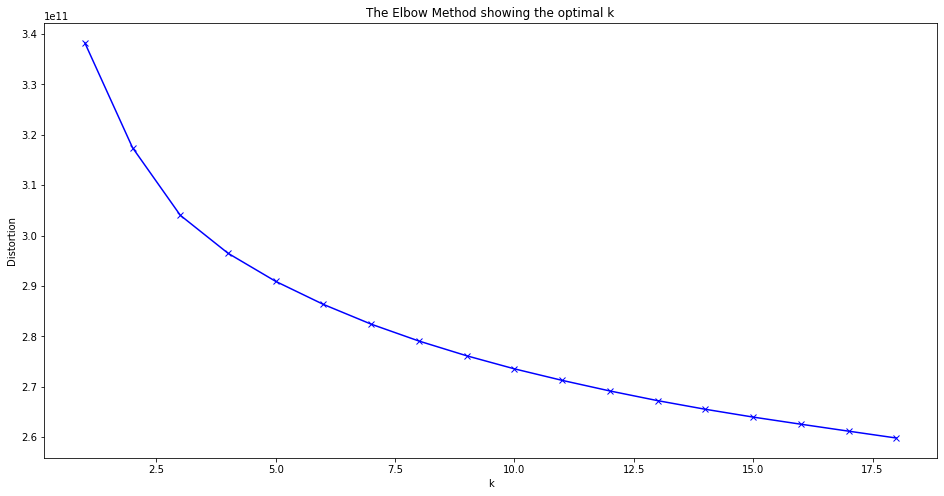

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
distortions1 = []
K = range(1,19)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(SURF_data)
    distortions1.append(kmeanModel.inertia_)
    print(distortions1)

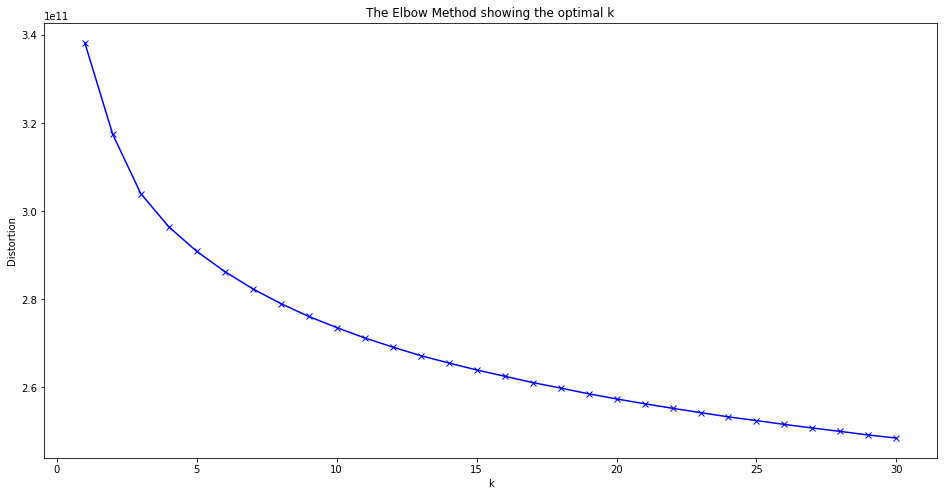

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions1, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# **K-means Clustering for ORB**

In [ ]:
ORB_data= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/orb_f.csv',header=None,dtype='float64')
ORB_data=ORB_data.astype(np.float64)


In [27]:
ORB_kmeans = KMeans(n_clusters=11)
ORB_kmeans.fit(ORB_data)

KMeans(n_clusters=11)

# **K means Clustering for SURF**

In [ ]:
SURF_data= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/surf_final.csv',header=None,dtype='float64')
SURF_data=SURF_data.astype(np.float64)

In [28]:
SURF_kmeans = KMeans(n_clusters=11)
SURF_kmeans.fit(SURF_data)


KMeans(n_clusters=11)

# **Saving the models**

In [29]:
import pickle

In [30]:
# save the model to disk
filename = r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_Kmeans.sav'
pickle.dump(ORB_kmeans, open(filename, 'wb'))

In [31]:
# save the model to disk
filename = r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_Kmeans.sav'
pickle.dump(SURF_kmeans, open(filename, 'wb'))

# **Opening models with pickle**

In [26]:
with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_Kmeans.sav", "rb") as input_file:
    ORB_kmeans = pickle.load(input_file)

In [27]:
with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_Kmeans.sav", "rb") as input_file:
    SURF_kmeans = pickle.load(input_file)

# **Creating Histogram for the ORB 

---

trained k-means labels.**

In [32]:
hist=np.histogram(ORB_kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
print('histogram of trained kmeans')
print(hist,"\n")
#hist1 = normal(hist[0])
#print(hist1,"\n")

histogram of trained kmeans
(array([157233, 172663, 165599, 157391, 158270, 176386, 183767, 211115,
       194214, 167872, 213287], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])) 



# **Creating Histogram for SURF trained k means labels**

In [33]:
hist=np.histogram(SURF_kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
print('histogram of trained kmeans')
print(hist,"\n")
#hist1 = normal(hist[0])
#print(hist1,"\n")

histogram of trained kmeans
(array([167367, 304320, 306834, 260347, 312901, 180769, 525298, 298608,
       202337, 381238, 246614], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])) 



In [34]:
with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_Kmeans.sav", "rb") as input_file:
    ORB_kmeans = pickle.load(input_file)

In [35]:
with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_Kmeans.sav", "rb") as input_file:
    SURF_kmeans = pickle.load(input_file)

# **Making Prediction using ORB k-means model**

In [36]:
#performing kmeans prediction of the entire Drivable road dataset with the pretrained SIFT kmeans model

#initialising i=0; as its the first class
i=0
data=[]
k=0

for filename in os.listdir(folder3):
    #path
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(800,500)
    img=cv2.resize(a,resize)
   
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    
    
    array_double = np.array(out, dtype=np.double)
    a=ORB_kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
    
    #normalization
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k>=2001:break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
data
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_PRED_POS.csv', mode='a',header=False,index=False)

In [37]:
#performing kmeans prediction of the entire Non Drivable road dataset with the pretrained SIFT kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder4):
    path=os.path.join(folder4,filename)
    a=cv2.imread(path)
    resize=(800,500)
    img=cv2.resize(a,resize)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    if (array_double.shape[0]  == 0 or array_double.shape[1]  == 0):
        array_double = np.zeros((1,128))
        print("True")
        print(array_double.shape)
        print(array_double)
    
    a=ORB_kmeans.predict(array_double)
    
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
    if len(keypoints) == 0:
        for j in range(11):
            hist[0][j] = 0
        data.append(hist[0])
    else:
        data.append(hist[0]/len(keypoints))
    k=k+1
    if k>=2001:
        break

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
data
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_PRED_NEG.csv', mode='a',header=False,index=False)


In [38]:
data

[array([0.12304251, 0.04474273, 0.09619687, 0.13199105, 0.10738255,
        0.09395973, 0.08724832, 0.03803132, 0.04474273, 0.16331096,
        0.06935123]),
 array([0.06393862, 0.16368286, 0.18158568, 0.09974425, 0.05626598,
        0.03580563, 0.07928389, 0.11764706, 0.06905371, 0.03324808,
        0.09974425]),
 array([0.048, 0.092, 0.056, 0.08 , 0.08 , 0.164, 0.078, 0.106, 0.11 ,
        0.084, 0.102]),
 array([0.09128631, 0.09751037, 0.04979253, 0.09128631, 0.08506224,
        0.06639004, 0.093361  , 0.10580913, 0.12655602, 0.06639004,
        0.12655602]),
 array([0.03455285, 0.07520325, 0.05284553, 0.08536585, 0.10162602,
        0.11382114, 0.12601626, 0.12601626, 0.11382114, 0.07317073,
        0.09756098]),
 array([0.046, 0.13 , 0.204, 0.048, 0.074, 0.058, 0.088, 0.104, 0.06 ,
        0.062, 0.126]),
 array([0.078, 0.076, 0.06 , 0.07 , 0.078, 0.094, 0.132, 0.13 , 0.082,
        0.082, 0.118]),
 array([0.096, 0.074, 0.082, 0.106, 0.064, 0.086, 0.114, 0.126, 0.084,
        0.05

# **Displaying ORB Kmeans predicted data**

In [39]:
print("Positive Class")
dat1= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_PRED_POS.csv',header=None)
print(dat1)

Positive Class
            0        1         2         3         4         5         6   \
0     0.110000  0.07200  0.014000  0.092000  0.144000  0.132000  0.088000   
1     0.100000  0.07000  0.046000  0.096000  0.096000  0.090000  0.092000   
2     0.104000  0.05600  0.046000  0.080000  0.052000  0.090000  0.140000   
3     0.092000  0.08200  0.068000  0.084000  0.094000  0.064000  0.052000   
4     0.064909  0.10142  0.040568  0.081136  0.141988  0.068966  0.095335   
...        ...      ...       ...       ...       ...       ...       ...   
1995  0.066000  0.09200  0.108000  0.090000  0.048000  0.084000  0.082000   
1996  0.022000  0.06200  0.114000  0.086000  0.048000  0.090000  0.098000   
1997  0.096000  0.05000  0.036000  0.116000  0.096000  0.114000  0.092000   
1998  0.086000  0.06800  0.206000  0.052000  0.044000  0.078000  0.068000   
1999  0.048000  0.09200  0.092000  0.098000  0.066000  0.066000  0.094000   

            7         8         9         10  11  
0     0.0

In [40]:
print("Negative Class")
dat2= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_PRED_NEG.csv',header=None)
print(dat2)

Negative Class
            0         1         2         3         4         5         6   \
0     0.123043  0.044743  0.096197  0.131991  0.107383  0.093960  0.087248   
1     0.063939  0.163683  0.181586  0.099744  0.056266  0.035806  0.079284   
2     0.048000  0.092000  0.056000  0.080000  0.080000  0.164000  0.078000   
3     0.091286  0.097510  0.049793  0.091286  0.085062  0.066390  0.093361   
4     0.034553  0.075203  0.052846  0.085366  0.101626  0.113821  0.126016   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.122000  0.048000  0.040000  0.076000  0.090000  0.100000  0.116000   
1996  0.078000  0.070000  0.038000  0.064000  0.094000  0.110000  0.120000   
1997  0.068000  0.074000  0.054000  0.074000  0.092000  0.092000  0.104000   
1998  0.080000  0.088000  0.076000  0.074000  0.060000  0.062000  0.108000   
1999  0.053191  0.057447  0.065957  0.091489  0.085106  0.078723  0.114894   

            7         8         9         10  11

In [41]:
dat2.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [42]:
#appending All classes into 1 csv file
Y=dat1.append(dat2)

In [43]:
csv_data=Y.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_FINAL_SAVE.csv', mode='a',header=False,index=False)

In [44]:
Y = pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_FINAL_SAVE.csv',header=None)
Y

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.110000,0.072000,0.014000,0.092000,0.144000,0.132000,0.088000,0.064000,0.096000,0.124000,0.064000,0
1,0.100000,0.070000,0.046000,0.096000,0.096000,0.090000,0.092000,0.108000,0.110000,0.098000,0.094000,0
2,0.104000,0.056000,0.046000,0.080000,0.052000,0.090000,0.140000,0.146000,0.070000,0.088000,0.128000,0
3,0.092000,0.082000,0.068000,0.084000,0.094000,0.064000,0.052000,0.164000,0.104000,0.084000,0.112000,0
4,0.064909,0.101420,0.040568,0.081136,0.141988,0.068966,0.095335,0.099391,0.123732,0.064909,0.117647,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.122000,0.048000,0.040000,0.076000,0.090000,0.100000,0.116000,0.102000,0.096000,0.086000,0.124000,1
3996,0.078000,0.070000,0.038000,0.064000,0.094000,0.110000,0.120000,0.082000,0.134000,0.066000,0.144000,1
3997,0.068000,0.074000,0.054000,0.074000,0.092000,0.092000,0.104000,0.122000,0.114000,0.076000,0.130000,1
3998,0.080000,0.088000,0.076000,0.074000,0.060000,0.062000,0.108000,0.106000,0.098000,0.074000,0.174000,1


# **Making prediction using SURF k-means model**

In [45]:
#performing kmeans prediction of the entire Drivable road dataset with the pretrained BRISK kmeans model

#initialising i=0; as its the first class
i=0
data=[]
k=0

for filename in os.listdir(folder3):
    #path
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(800,500)
    img=cv2.resize(a,resize)
    
    
    surf = cv2.xfeatures2d.SURF_create(800)
    keypoints, descriptors = surf.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    
    
    array_double = np.array(out, dtype=np.double)
    a=SURF_kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])

    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k>=2001:break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_PRED_POS.csv', mode='a',header=False,index=False)

In [46]:
data

[array([0.03144654, 0.10761705, 0.06568833, 0.04961565, 0.07197764,
        0.09433962, 0.22501747, 0.15793152, 0.04192872, 0.0873515 ,
        0.06708595]),
 array([0.07731959, 0.10137457, 0.09278351, 0.10051546, 0.12113402,
        0.06271478, 0.07646048, 0.07302405, 0.09106529, 0.12113402,
        0.08247423]),
 array([0.05696757, 0.10692375, 0.08851884, 0.06836109, 0.10341805,
        0.08063103, 0.11744084, 0.10692375, 0.07274321, 0.11481157,
        0.0832603 ]),
 array([0.05497382, 0.03926702, 0.05235602, 0.10994764, 0.08115183,
        0.04188482, 0.13612565, 0.06544503, 0.08376963, 0.26701571,
        0.06806283]),
 array([0.10675381, 0.01960784, 0.03703704, 0.1546841 , 0.06100218,
        0.03050109, 0.22875817, 0.07407407, 0.05446623, 0.18300654,
        0.05010893]),
 array([0.06818182, 0.08333333, 0.08522727, 0.09280303, 0.09469697,
        0.06628788, 0.18371212, 0.10795455, 0.05397727, 0.1032197 ,
        0.06060606]),
 array([0.05267235, 0.07203718, 0.11076685, 0.080557

In [48]:
#performing kmeans prediction of the entire Non Drivable road dataset with the pretrained BRISK kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder4):
    path=os.path.join(folder4,filename)
    a=cv2.imread(path)
    resize=(800,500)
    img=cv2.resize(a,resize)

    surf = cv2.xfeatures2d.SURF_create(800)
    keypoints, descriptors = surf.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    if (array_double.shape[0]  == 0 or array_double.shape[1]  == 0):
        array_double = np.zeros((1,64))
        print("True")
        print(array_double.shape)
        print(array_double)
    
    a=SURF_kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    if len(keypoints) == 0:
        for j in range(11):
            hist[0][j] = 0
        data.append(hist[0])
    else:
        data.append(hist[0]/len(keypoints))
    k=k+1
    if k>=2001:
        break

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_PRED_NEG.csv', mode='a',header=False,index=False)

In [49]:
data

[array([0.04006969, 0.08362369, 0.05923345, 0.07142857, 0.08885017,
        0.18815331, 0.10278746, 0.14285714, 0.06445993, 0.1010453 ,
        0.05749129]),
 array([0.02409639, 0.08433735, 0.07228916, 0.20481928, 0.08433735,
        0.02409639, 0.06024096, 0.04819277, 0.1686747 , 0.09638554,
        0.13253012]),
 array([0.04187438, 0.110668  , 0.13459621, 0.07577268, 0.11764706,
        0.10269192, 0.10967099, 0.09172483, 0.06380857, 0.0448654 ,
        0.10667996]),
 array([0.04631579, 0.11157895, 0.09684211, 0.16842105, 0.09473684,
        0.05263158, 0.10736842, 0.09473684, 0.09263158, 0.00631579,
        0.12842105]),
 array([0.03703704, 0.06995885, 0.1399177 , 0.19341564, 0.0617284 ,
        0.03703704, 0.04938272, 0.06995885, 0.1399177 , 0.03292181,
        0.16872428]),
 array([0.02725367, 0.01886792, 0.03983229, 0.11949686, 0.04612159,
        0.01886792, 0.37526205, 0.05870021, 0.0230608 , 0.23689727,
        0.03563941]),
 array([0.04840941, 0.12171508, 0.10650069, 0.128630

# **Displaying SURF k means predicted data**

In [50]:
print("SURF POSITIVE")
dat3= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_PRED_POS.csv',header=None)
print(dat3)

SURF POSITIVE
            0         1         2         3         4         5         6   \
0     0.031447  0.107617  0.065688  0.049616  0.071978  0.094340  0.225017   
1     0.077320  0.101375  0.092784  0.100515  0.121134  0.062715  0.076460   
2     0.056968  0.106924  0.088519  0.068361  0.103418  0.080631  0.117441   
3     0.054974  0.039267  0.052356  0.109948  0.081152  0.041885  0.136126   
4     0.106754  0.019608  0.037037  0.154684  0.061002  0.030501  0.228758   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.068796  0.071253  0.089271  0.072891  0.077805  0.029484  0.173628   
1996  0.058920  0.031097  0.081833  0.086743  0.129296  0.058920  0.184943   
1997  0.046990  0.136748  0.115628  0.061246  0.108237  0.057022  0.169483   
1998  0.067288  0.050725  0.086957  0.096273  0.094203  0.068323  0.219462   
1999  0.061384  0.148438  0.125000  0.075893  0.116071  0.024554  0.123884   

            7         8         9         10  11 

In [51]:
print("SURF negative")
dat4= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_PRED_NEG.csv',header=None)
print(dat4)

SURF negative
            0         1         2         3         4         5         6   \
0     0.040070  0.083624  0.059233  0.071429  0.088850  0.188153  0.102787   
1     0.024096  0.084337  0.072289  0.204819  0.084337  0.024096  0.060241   
2     0.041874  0.110668  0.134596  0.075773  0.117647  0.102692  0.109671   
3     0.046316  0.111579  0.096842  0.168421  0.094737  0.052632  0.107368   
4     0.037037  0.069959  0.139918  0.193416  0.061728  0.037037  0.049383   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.055375  0.065147  0.084691  0.078990  0.083062  0.052932  0.219870   
1996  0.054000  0.052000  0.116000  0.112000  0.128000  0.052000  0.158000   
1997  0.057884  0.101796  0.097804  0.091816  0.129741  0.037924  0.103792   
1998  0.037849  0.025896  0.087649  0.135458  0.083665  0.031873  0.173307   
1999  0.043321  0.046931  0.144404  0.126354  0.133574  0.025271  0.133574   

            7         8         9         10  11 

In [52]:
#appending All classes into 1 csv file
Z=dat3.append(dat4)

In [53]:
csv_data=Z.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_FINAL_SAVE.csv', mode='a',header=False,index=False)

In [54]:
Z = pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_FINAL_SAVE.csv',header=None)
Z

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.031447,0.107617,0.065688,0.049616,0.071978,0.094340,0.225017,0.157932,0.041929,0.087352,0.067086,0
1,0.077320,0.101375,0.092784,0.100515,0.121134,0.062715,0.076460,0.073024,0.091065,0.121134,0.082474,0
2,0.056968,0.106924,0.088519,0.068361,0.103418,0.080631,0.117441,0.106924,0.072743,0.114812,0.083260,0
3,0.054974,0.039267,0.052356,0.109948,0.081152,0.041885,0.136126,0.065445,0.083770,0.267016,0.068063,0
4,0.106754,0.019608,0.037037,0.154684,0.061002,0.030501,0.228758,0.074074,0.054466,0.183007,0.050109,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.055375,0.065147,0.084691,0.078990,0.083062,0.052932,0.219870,0.115635,0.056189,0.135993,0.052117,1
3996,0.054000,0.052000,0.116000,0.112000,0.128000,0.052000,0.158000,0.058000,0.096000,0.084000,0.090000,1
3997,0.057884,0.101796,0.097804,0.091816,0.129741,0.037924,0.103792,0.075848,0.133733,0.065868,0.103792,1
3998,0.037849,0.025896,0.087649,0.135458,0.083665,0.031873,0.173307,0.053785,0.065737,0.262948,0.041833,1


# **Concatenation of ORB and SURF kmeans predicted data**

In [137]:
Y1 = Y.iloc[:,0:11].values

In [139]:
A = np.concatenate([Y1,Z], axis=1)

In [143]:
A = pd.DataFrame(A)

In [144]:
csv_data=A.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/orbsurf.csv', mode='a',header=False,index=False)

In [145]:
A = pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/orbsurf.csv',header=None)
A

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.110000,0.072000,0.014000,0.092000,0.144000,0.132000,0.088000,0.064000,0.096000,0.124000,...,0.065688,0.049616,0.071978,0.094340,0.225017,0.157932,0.041929,0.087352,0.067086,0.0
1,0.100000,0.070000,0.046000,0.096000,0.096000,0.090000,0.092000,0.108000,0.110000,0.098000,...,0.092784,0.100515,0.121134,0.062715,0.076460,0.073024,0.091065,0.121134,0.082474,0.0
2,0.104000,0.056000,0.046000,0.080000,0.052000,0.090000,0.140000,0.146000,0.070000,0.088000,...,0.088519,0.068361,0.103418,0.080631,0.117441,0.106924,0.072743,0.114812,0.083260,0.0
3,0.092000,0.082000,0.068000,0.084000,0.094000,0.064000,0.052000,0.164000,0.104000,0.084000,...,0.052356,0.109948,0.081152,0.041885,0.136126,0.065445,0.083770,0.267016,0.068063,0.0
4,0.064909,0.101420,0.040568,0.081136,0.141988,0.068966,0.095335,0.099391,0.123732,0.064909,...,0.037037,0.154684,0.061002,0.030501,0.228758,0.074074,0.054466,0.183007,0.050109,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.122000,0.048000,0.040000,0.076000,0.090000,0.100000,0.116000,0.102000,0.096000,0.086000,...,0.084691,0.078990,0.083062,0.052932,0.219870,0.115635,0.056189,0.135993,0.052117,1.0
3996,0.078000,0.070000,0.038000,0.064000,0.094000,0.110000,0.120000,0.082000,0.134000,0.066000,...,0.116000,0.112000,0.128000,0.052000,0.158000,0.058000,0.096000,0.084000,0.090000,1.0
3997,0.068000,0.074000,0.054000,0.074000,0.092000,0.092000,0.104000,0.122000,0.114000,0.076000,...,0.097804,0.091816,0.129741,0.037924,0.103792,0.075848,0.133733,0.065868,0.103792,1.0
3998,0.080000,0.088000,0.076000,0.074000,0.060000,0.062000,0.108000,0.106000,0.098000,0.074000,...,0.087649,0.135458,0.083665,0.031873,0.173307,0.053785,0.065737,0.262948,0.041833,1.0


# **Seperating data into dependent and independent variables**

In [146]:
x = A.iloc[:,0:22].values

In [147]:
x

array([[0.11      , 0.072     , 0.014     , ..., 0.04192872, 0.0873515 ,
        0.06708595],
       [0.1       , 0.07      , 0.046     , ..., 0.09106529, 0.12113402,
        0.08247423],
       [0.104     , 0.056     , 0.046     , ..., 0.07274321, 0.11481157,
        0.0832603 ],
       ...,
       [0.068     , 0.074     , 0.054     , ..., 0.13373253, 0.06586826,
        0.10379242],
       [0.08      , 0.088     , 0.076     , ..., 0.06573705, 0.26294821,
        0.04183267],
       [0.05319149, 0.05744681, 0.06595745, ..., 0.05776173, 0.11552347,
        0.06859206]])

In [180]:
y = A.iloc[:,22].values

In [184]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [210]:
y=y.astype(np.uint8)
y= np.reshape(y,(4000,1))

In [211]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

# **Feature Scaling**

In [212]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [213]:
Dhoni

array([[ 1.05431564, -0.63348629, -1.25746866, ..., -0.91530939,
        -0.50305475, -0.19690219],
       [ 0.70003847, -0.70950102, -0.69899228, ...,  0.55491047,
        -0.17170979,  0.29706956],
       [ 0.84174934, -1.24160411, -0.69899228, ...,  0.0066937 ,
        -0.23372153,  0.32230287],
       ...,
       [-0.43364845, -0.55747156, -0.55937318, ...,  1.83156097,
        -0.71376618,  0.98139475],
       [-0.00851585, -0.02536847, -0.17542066, ..., -0.20293814,
         1.219229  , -1.00754606],
       [-0.95828016, -1.18661473, -0.35068719, ..., -0.44156839,
        -0.22673912, -0.14855545]])

# **PCA for column reduction**

In [214]:
from sklearn.decomposition import PCA

In [215]:
pca = PCA(n_components=None)
pca.fit(Dhoni)

PCA()

In [216]:
y_red = pca.transform(Dhoni)  #PCA transformation

In [217]:
y_red

array([[-3.37028289e+00,  3.73080207e+00, -9.69446441e-01, ...,
        -5.61946375e-02,  7.63622729e-17,  4.28791278e-16],
       [-1.51351290e+00, -5.01589454e-01, -1.33208544e+00, ...,
         3.62116236e-01, -1.47955819e-16, -1.32518665e-16],
       [-1.60310915e+00, -3.88498307e-01, -2.59907915e-01, ...,
        -5.47378150e-04,  2.29948945e-16,  2.14096762e-16],
       ...,
       [-8.69079476e-01, -2.26796515e+00, -5.37551185e-01, ...,
         1.92517787e-01,  2.13674890e-16, -4.94745004e-18],
       [ 2.35485296e+00, -2.88267271e-01, -1.91660414e-01, ...,
         7.09494070e-02, -8.34223492e-16,  4.42424892e-16],
       [-4.80291058e-01, -1.60095896e+00, -5.16386796e-01, ...,
        -3.14418539e-01,  1.10912685e-15, -5.12893407e-17]])

In [218]:
y_red = pd.DataFrame(y_red)

In [219]:
y_red

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-3.370283,3.730802,-0.969446,0.167280,0.700184,-1.303659,0.259257,-0.320746,0.759484,0.455035,...,-0.247297,-0.142024,-0.221235,-0.352230,0.123867,0.537341,-0.070673,-0.056195,7.636227e-17,4.287913e-16
1,-1.513513,-0.501589,-1.332085,0.562147,-0.415359,-0.435854,0.382693,0.518986,0.273047,-0.044194,...,-0.129473,-0.500013,0.317902,0.298529,0.174076,-0.073318,0.491427,0.362116,-1.479558e-16,-1.325187e-16
2,-1.603109,-0.388498,-0.259908,-0.645816,0.945257,2.425636,-0.452378,1.048023,-1.376196,-0.330584,...,-0.286773,0.453407,0.542911,-0.492336,0.234598,0.289632,0.607311,-0.000547,2.299489e-16,2.140968e-16
3,1.575055,0.167865,-1.260304,0.456629,0.176252,-1.328312,0.445640,-0.436530,-0.998132,0.675033,...,-0.477773,0.622994,0.748989,0.391951,0.063033,-0.040511,0.006053,-0.247246,1.779068e-16,5.380441e-16
4,1.947927,0.241873,-2.907526,-0.118392,-0.290119,-0.945196,-0.581261,0.309429,2.227126,0.339656,...,-0.642121,-0.241223,-1.244350,-0.757784,-0.358896,0.948779,0.332763,-0.535634,3.500045e-16,-1.501915e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.764620,1.257132,-1.228582,-0.643388,0.079361,1.029278,-0.811378,0.594583,-0.392884,-0.288594,...,0.638876,-0.257518,0.537111,-0.950639,0.042663,0.426736,-0.258735,-0.081786,3.004577e-16,-6.862143e-16
3996,-0.488243,-1.470607,-0.778434,-0.534125,-0.645177,0.351360,-1.455647,-0.398270,0.390346,-0.815086,...,-0.142343,-0.811996,0.750026,-0.576839,0.425662,-0.210924,0.649967,-0.168944,1.345936e-16,-3.918652e-16
3997,-0.869079,-2.267965,-0.537551,0.191576,-0.370515,-0.004983,-0.543678,-0.457589,-0.378257,0.198602,...,-0.575866,-0.226193,0.389154,-0.178168,0.972120,0.656005,0.123745,0.192518,2.136749e-16,-4.947450e-18
3998,2.354853,-0.288267,-0.191660,-0.580099,-0.177797,1.895742,-1.249182,-0.967622,-0.220750,-0.950172,...,-0.228814,0.189214,0.569480,0.199683,-0.421554,-0.511557,-0.359363,0.070949,-8.342235e-16,4.424249e-16


In [220]:
y_red.shape

(4000, 22)

In [221]:
print(pca.explained_variance_ratio_) 

[2.31271703e-01 1.69577996e-01 9.69999897e-02 6.69596555e-02
 4.72789385e-02 4.60647397e-02 4.23282872e-02 3.76249558e-02
 3.35786438e-02 3.30282932e-02 2.93998053e-02 2.76844166e-02
 2.55206617e-02 2.22789841e-02 2.08895708e-02 1.94205190e-02
 1.47739836e-02 1.39391326e-02 1.26244474e-02 8.75527626e-03
 1.79864633e-32 6.10029293e-33]


Text(0, 0.5, 'cumulative explained variance')

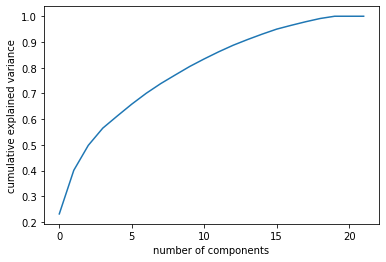

In [222]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [223]:
l = pca.explained_variance_ratio_
l = l[:17]
l.sum()

0.964681143663284

In [224]:
pca = PCA(n_components=17)  #performing PCA using n_components=17
pca.fit(Dhoni)

PCA(n_components=17)

In [225]:
# save the model to disk
import pickle
filename = 'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/PCA_Model_orbsurf.pkl'
pickle.dump(pca, open(filename, 'wb'))

In [226]:
y_reduced = pca.transform(Dhoni)

In [227]:
y_reduced

array([[-3.37028289,  3.73080207, -0.96944644, ..., -0.22123506,
        -0.3522305 ,  0.12386657],
       [-1.5135129 , -0.50158945, -1.33208544, ...,  0.31790216,
         0.29852893,  0.17407649],
       [-1.60310915, -0.38849831, -0.25990792, ...,  0.54291053,
        -0.49233613,  0.23459755],
       ...,
       [-0.86907948, -2.26796515, -0.53755118, ...,  0.38915371,
        -0.17816778,  0.97212008],
       [ 2.35485296, -0.28826727, -0.19166041, ...,  0.56947983,
         0.19968274, -0.42155368],
       [-0.48029106, -1.60095896, -0.5163868 , ...,  0.32698487,
         0.54183964, -0.89688317]])

In [228]:
y_reduced.shape

(4000, 17)

In [229]:
print(pca.explained_variance_ratio_) 

[0.2312717  0.169578   0.09699999 0.06695966 0.04727894 0.04606474
 0.04232829 0.03762496 0.03357864 0.03302829 0.02939981 0.02768442
 0.02552066 0.02227898 0.02088957 0.01942052 0.01477398]


In [230]:
y_reduced = pd.DataFrame(y_reduced)

In [231]:
y_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-3.370283,3.730802,-0.969446,0.167280,0.700184,-1.303659,0.259257,-0.320746,0.759484,0.455035,-0.710294,1.196512,-0.247297,-0.142024,-0.221235,-0.352230,0.123867
1,-1.513513,-0.501589,-1.332085,0.562147,-0.415359,-0.435854,0.382693,0.518986,0.273047,-0.044194,-0.096695,-0.811479,-0.129473,-0.500013,0.317902,0.298529,0.174076
2,-1.603109,-0.388498,-0.259908,-0.645816,0.945257,2.425636,-0.452378,1.048023,-1.376196,-0.330584,-0.263831,-0.774032,-0.286773,0.453407,0.542911,-0.492336,0.234598
3,1.575055,0.167865,-1.260304,0.456629,0.176252,-1.328312,0.445640,-0.436530,-0.998132,0.675033,-0.583379,-1.695840,-0.477773,0.622994,0.748989,0.391951,0.063033
4,1.947927,0.241873,-2.907526,-0.118392,-0.290119,-0.945196,-0.581261,0.309429,2.227126,0.339656,0.073326,-0.200021,-0.642121,-0.241223,-1.244350,-0.757784,-0.358896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.764620,1.257132,-1.228582,-0.643388,0.079361,1.029278,-0.811378,0.594583,-0.392884,-0.288594,-0.921039,0.178006,0.638876,-0.257518,0.537111,-0.950639,0.042663
3996,-0.488243,-1.470607,-0.778434,-0.534125,-0.645177,0.351360,-1.455647,-0.398270,0.390346,-0.815086,-0.710429,1.554175,-0.142343,-0.811996,0.750026,-0.576839,0.425662
3997,-0.869079,-2.267965,-0.537551,0.191576,-0.370515,-0.004983,-0.543678,-0.457589,-0.378257,0.198602,-0.517426,0.298275,-0.575866,-0.226193,0.389154,-0.178168,0.972120
3998,2.354853,-0.288267,-0.191660,-0.580099,-0.177797,1.895742,-1.249182,-0.967622,-0.220750,-0.950172,-0.967798,-0.392089,-0.228814,0.189214,0.569480,0.199683,-0.421554


In [232]:
B=pd.concat([y_reduced, pd.DataFrame(y)],axis=1)

In [233]:
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0
0,-3.370283,3.730802,-0.969446,0.167280,0.700184,-1.303659,0.259257,-0.320746,0.759484,0.455035,-0.710294,1.196512,-0.247297,-0.142024,-0.221235,-0.352230,0.123867,0
1,-1.513513,-0.501589,-1.332085,0.562147,-0.415359,-0.435854,0.382693,0.518986,0.273047,-0.044194,-0.096695,-0.811479,-0.129473,-0.500013,0.317902,0.298529,0.174076,0
2,-1.603109,-0.388498,-0.259908,-0.645816,0.945257,2.425636,-0.452378,1.048023,-1.376196,-0.330584,-0.263831,-0.774032,-0.286773,0.453407,0.542911,-0.492336,0.234598,0
3,1.575055,0.167865,-1.260304,0.456629,0.176252,-1.328312,0.445640,-0.436530,-0.998132,0.675033,-0.583379,-1.695840,-0.477773,0.622994,0.748989,0.391951,0.063033,0
4,1.947927,0.241873,-2.907526,-0.118392,-0.290119,-0.945196,-0.581261,0.309429,2.227126,0.339656,0.073326,-0.200021,-0.642121,-0.241223,-1.244350,-0.757784,-0.358896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.764620,1.257132,-1.228582,-0.643388,0.079361,1.029278,-0.811378,0.594583,-0.392884,-0.288594,-0.921039,0.178006,0.638876,-0.257518,0.537111,-0.950639,0.042663,1
3996,-0.488243,-1.470607,-0.778434,-0.534125,-0.645177,0.351360,-1.455647,-0.398270,0.390346,-0.815086,-0.710429,1.554175,-0.142343,-0.811996,0.750026,-0.576839,0.425662,1
3997,-0.869079,-2.267965,-0.537551,0.191576,-0.370515,-0.004983,-0.543678,-0.457589,-0.378257,0.198602,-0.517426,0.298275,-0.575866,-0.226193,0.389154,-0.178168,0.972120,1
3998,2.354853,-0.288267,-0.191660,-0.580099,-0.177797,1.895742,-1.249182,-0.967622,-0.220750,-0.950172,-0.967798,-0.392089,-0.228814,0.189214,0.569480,0.199683,-0.421554,1


In [234]:
csv_data=B.to_csv('C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/FinalPCA.csv', mode='a',header=False,index=False)

# **Training ,Testing & Classification**

In [5]:
data= pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/FinalPCA.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-3.370283,3.730802,-0.969446,0.167280,0.700184,-1.303659,0.259257,-0.320746,0.759484,0.455035,-0.710294,1.196512,-0.247297,-0.142024,-0.221235,-0.352230,0.123867,0
1,-1.513513,-0.501589,-1.332085,0.562147,-0.415359,-0.435854,0.382693,0.518986,0.273047,-0.044194,-0.096695,-0.811479,-0.129473,-0.500013,0.317902,0.298529,0.174076,0
2,-1.603109,-0.388498,-0.259908,-0.645816,0.945257,2.425636,-0.452378,1.048023,-1.376196,-0.330584,-0.263831,-0.774032,-0.286773,0.453407,0.542911,-0.492336,0.234598,0
3,1.575055,0.167865,-1.260304,0.456629,0.176252,-1.328312,0.445640,-0.436530,-0.998132,0.675033,-0.583379,-1.695840,-0.477773,0.622994,0.748989,0.391951,0.063033,0
4,1.947927,0.241873,-2.907526,-0.118392,-0.290119,-0.945196,-0.581261,0.309429,2.227126,0.339656,0.073326,-0.200021,-0.642121,-0.241223,-1.244350,-0.757784,-0.358896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.764620,1.257132,-1.228582,-0.643388,0.079361,1.029278,-0.811378,0.594583,-0.392884,-0.288594,-0.921039,0.178006,0.638876,-0.257518,0.537111,-0.950639,0.042663,1
3996,-0.488243,-1.470607,-0.778434,-0.534125,-0.645177,0.351360,-1.455647,-0.398270,0.390346,-0.815086,-0.710429,1.554175,-0.142343,-0.811996,0.750026,-0.576839,0.425662,1
3997,-0.869079,-2.267965,-0.537551,0.191576,-0.370515,-0.004983,-0.543678,-0.457589,-0.378257,0.198602,-0.517426,0.298275,-0.575866,-0.226193,0.389154,-0.178168,0.972120,1
3998,2.354853,-0.288267,-0.191660,-0.580099,-0.177797,1.895742,-1.249182,-0.967622,-0.220750,-0.950172,-0.967798,-0.392089,-0.228814,0.189214,0.569480,0.199683,-0.421554,1


In [6]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:17].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,17]
print("Y values")
print(y)

X values
[[-3.37028289  3.73080207 -0.96944644 ... -0.22123506 -0.3522305
   0.12386657]
 [-1.5135129  -0.50158945 -1.33208544 ...  0.31790216  0.29852893
   0.17407649]
 [-1.60310915 -0.38849831 -0.25990792 ...  0.54291053 -0.49233613
   0.23459755]
 ...
 [-0.86907948 -2.26796515 -0.53755118 ...  0.38915371 -0.17816778
   0.97212008]
 [ 2.35485296 -0.28826727 -0.19166041 ...  0.56947983  0.19968274
  -0.42155368]
 [-0.48029106 -1.60095896 -0.5163868  ...  0.32698487  0.54183964
  -0.89688317]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
3995    1
3996    1
3997    1
3998    1
3999    1
Name: 17, Length: 4000, dtype: int64


In [7]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [8]:
from sklearn import preprocessing
from sklearn import utils


In [9]:
#Decision Tree Classifier
#Assign model with Decision Tree classifier
model1 = DecisionTreeClassifier(max_depth=9)

#training the model with the Training Variables 
model1.fit(x_train, y_train)
#predicting the traget variable using testing variables
y_pred1 = model1.predict(x_test)
#Results
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy: ",accuracy_score(y_test, y_pred1))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))
print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred1))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred1))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred1))
print("Mean Squred Error",mean_squared_error(y_test, y_pred1))


Decision Tree Results
Train Accuracy: 0.8496875
Test Accuracy:  0.72625
Confusion Matrix: 
[[290 117]
 [102 291]]
+ve Precision: 0.7132352941176471
-ve Precision: 0.7397959183673469
+ve Recall: 0.7404580152671756
-ve Recall: 0.7125307125307125
+ve F1 Score: 0.7265917602996256
-ve F1 Score: 0.7259073842302879


Sensitivity 0.7404580152671756
Specificity: 0.7125307125307125
Overall Precision Score:  0.7132352941176471
Overall Recall Score:  0.7404580152671756
Overall F1 Score:  0.7265917602996256
Mean Squred Error 0.27375


Area under Curve: 0.7264943638989441


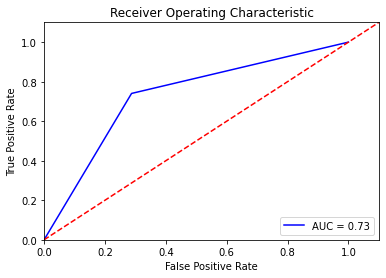

In [10]:
probs = model1.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:

# Random Forest Classifier

model2 = RandomForestClassifier(n_estimators= 100,max_depth = 9)

model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print("Random Forest results")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred2))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred2))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred2))
print("Overall Mean Squred Error",mean_squared_error(y_test, y_pred2))


Random Forest results
Train Accuracy: 0.918125
Test Accuracy: 0.76625
Confusion Matrix: 
[[321  86]
 [101 292]]
+ve Precision: 0.7724867724867724
-ve Precision: 0.7606635071090048
+ve Recall: 0.7430025445292621
-ve Recall: 0.7886977886977887
+ve F1 Score: 0.7574578469520103
-ve F1 Score: 0.7744270205066346


Sensitivity 0.7430025445292621
Specificity: 0.7886977886977887
Overall Precision Score:  0.7724867724867724
Overall Recall Score:  0.7430025445292621
Overall F1 Score:  0.7574578469520103
Overall Mean Squred Error 0.23375


Area under Curve: 0.7658501666135255


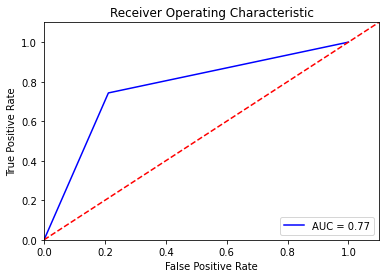

In [12]:
probs = model2.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
# K nearest neighbour (KNN)
model3 = KNN(n_neighbors=7) 
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print("K Nearest Neigbours Results")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred3).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred3))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred3))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred3))
print("Mean Squred Error",mean_squared_error(y_test, y_pred3))


K Nearest Neigbours Results
Train Accuracy: 0.76375
Test Accuracy: 0.685
Confusion Matrix: 
[[277 130]
 [122 271]]
+ve Precision: 0.6758104738154613
-ve Precision: 0.6942355889724311
+ve Recall: 0.6895674300254453
-ve Recall: 0.6805896805896806
+ve F1 Score: 0.6826196473551637
-ve F1 Score: 0.6873449131513648


Sensitivity 0.6895674300254453
Specificity: 0.6805896805896806
Overall Precision Score:  0.6758104738154613
Overall Recall Score:  0.6895674300254453
Overall F1 Score:  0.6826196473551637
Mean Squred Error 0.315


Area under Curve: 0.6850785553075629


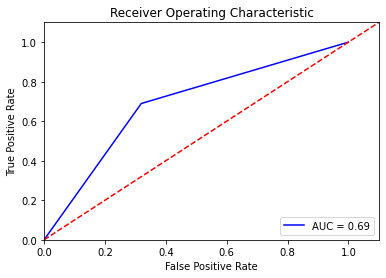

In [14]:
probs = model3.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred3)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
#SVM Classifier : Linear
model4 = svm.SVC(kernel='linear',probability=True)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print("SVM Linear kernel results")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred4).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred4))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred4))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred4))
print("Overall Mean Squred Error",mean_squared_error(y_test, y_pred4))


SVM Linear kernel results
Train Accuracy: 0.6809375
Test Accuracy: 0.65875
Confusion Matrix: 
[[303 104]
 [169 224]]
+ve Precision: 0.6829268292682927
-ve Precision: 0.6419491525423728
+ve Recall: 0.5699745547073791
-ve Recall: 0.7444717444717445
+ve F1 Score: 0.6213592233009709
-ve F1 Score: 0.6894197952218429


Sensitivity 0.5699745547073791
Specificity: 0.7444717444717445
Overall Precision Score:  0.6829268292682927
Overall Recall Score:  0.5699745547073791
Overall F1 Score:  0.6213592233009709
Overall Mean Squred Error 0.34125


Area under Curve: 0.6572231495895619


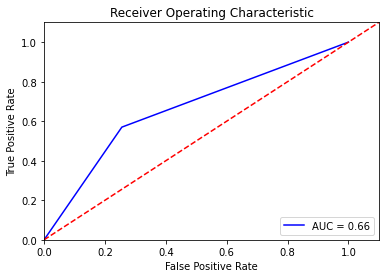

In [16]:
probs = model4.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred4)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
#SVM Classifier : Polynomial
model5 = svm.SVC(kernel='poly', degree = 3,probability=True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print("SVM Polynomial kernel results")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred5))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred5))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred5))
print("Mean Squred Error",mean_squared_error(y_test, y_pred5))

SVM Polynomial kernel results
Train Accuracy: 0.754375
Test Accuracy: 0.69
Confusion Matrix: 
[[345  62]
 [186 207]]
+ve Precision: 0.7132352941176471
-ve Precision: 0.7397959183673469
+ve Recall: 0.7404580152671756
-ve Recall: 0.7125307125307125
+ve F1 Score: 0.7265917602996256
-ve F1 Score: 0.7259073842302879


Sensitivity 0.7404580152671756
Specificity: 0.7125307125307125
Overall Precision Score:  0.7695167286245354
Overall Recall Score:  0.5267175572519084
Overall F1 Score:  0.6253776435045317
Mean Squred Error 0.31


Area under Curve: 0.687191702458878


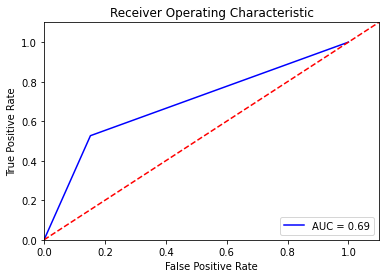

In [18]:
probs = model5.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred5)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
#SVM Classifier : Rbf
model6 = svm.SVC(kernel='rbf',probability=True)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
print("SVM rbf kernel results")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred6))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred6).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred6))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred6))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred6))
print("Mean Squred Error",mean_squared_error(y_test, y_pred6))


SVM rbf kernel results
Train Accuracy: 0.7884375
Test Accuracy: 0.70625
Confusion Matrix: 
[[307 100]
 [135 258]]
+ve Precision: 0.7206703910614525
-ve Precision: 0.6945701357466063
+ve Recall: 0.6564885496183206
-ve Recall: 0.7542997542997543
+ve F1 Score: 0.6870838881491345
-ve F1 Score: 0.7232037691401648


Sensitivity 0.6564885496183206
Specificity: 0.7542997542997543
Overall Precision Score:  0.7206703910614525
Overall Recall Score:  0.6564885496183206
Overall F1 Score:  0.6870838881491345
Mean Squred Error 0.29375


Area under Curve: 0.7053941519590374


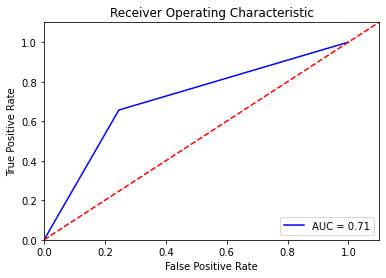

In [20]:
probs = model6.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred6)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
#Logistic Regression
model7 = LogisticRegression()
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print("Logistic Regression results")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred7))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred7).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred7))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred7))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred7))
print("Mean Squred Error",mean_squared_error(y_test, y_pred7))

Logistic Regression results
Train Accuracy: 0.6809375
Test Accuracy: 0.665
Confusion Matrix: 
[[290 117]
 [151 242]]
+ve Precision: 0.6740947075208914
-ve Precision: 0.6575963718820862
+ve Recall: 0.6157760814249363
-ve Recall: 0.7125307125307125
+ve F1 Score: 0.6436170212765957
-ve F1 Score: 0.6839622641509434


Sensitivity 0.6157760814249363
Specificity: 0.7125307125307125
Overall Precision Score:  0.6740947075208914
Overall Recall Score:  0.6157760814249363
Overall F1 Score:  0.6436170212765957
Mean Squred Error 0.335


Area under Curve: 0.6641533969778245


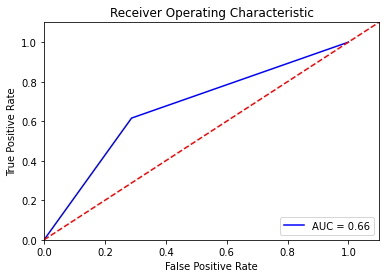

In [22]:
probs = model7.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred7)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
# XGBoost
model8 = XGBClassifier()
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
print("XG-Boost Classifier Results")
print("Train Accuracy:",model8.score(x_train, y_train))
print("Test Accuracy:",model8.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred8))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred8).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred8))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred8))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred8))
print("Mean Squred Error",mean_squared_error(y_test, y_pred8))

C:\Users\rachn\anaconda3\envs\mytest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG-Boost Classifier Results
Train Accuracy: 1.0
Test Accuracy: 0.875
Confusion Matrix: 
[[330  77]
 [ 23 370]]
+ve Precision: 0.8277404921700223
-ve Precision: 0.9348441926345609
+ve Recall: 0.9414758269720102
-ve Recall: 0.8108108108108109
+ve F1 Score: 0.8809523809523809
-ve F1 Score: 0.868421052631579


Sensitivity 0.9414758269720102
Specificity: 0.8108108108108109
Overall Precision Score:  0.8277404921700223
Overall Recall Score:  0.9414758269720102
Overall F1 Score:  0.8809523809523809
Mean Squred Error 0.125


Area under Curve: 0.8761433188914104


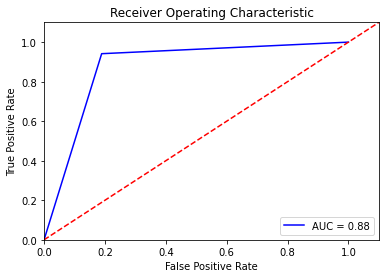

In [24]:
probs = model8.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred8)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
# Gaussian Naive Bayes
model9 = GaussianNB()
model9.fit(x_train, y_train)
y_pred9 = model9.predict(x_test)
print("XG-Boost Classifier Results")
print("Train Accuracy:",model9.score(x_train, y_train))
print("Test Accuracy:",model9.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred9))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred9).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred9))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred9))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred9))
print("Mean Squred Error",mean_squared_error(y_test, y_pred9))

XG-Boost Classifier Results
Train Accuracy: 0.636875
Test Accuracy: 0.63125
Confusion Matrix: 
[[328  79]
 [216 177]]
+ve Precision: 0.69140625
-ve Precision: 0.6029411764705882
+ve Recall: 0.45038167938931295
-ve Recall: 0.8058968058968059
+ve F1 Score: 0.5454545454545454
-ve F1 Score: 0.6898002103049421


Sensitivity 0.45038167938931295
Specificity: 0.8058968058968059
Overall Precision Score:  0.69140625
Overall Recall Score:  0.45038167938931295
Overall F1 Score:  0.5454545454545454
Mean Squred Error 0.36875


Area under Curve: 0.6281392426430594


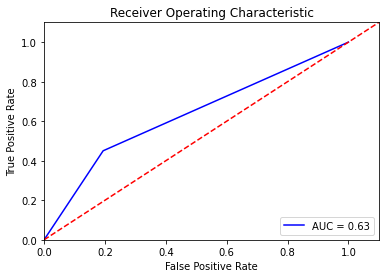

In [26]:
probs = model9.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred9)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Voting Classifier**

In [27]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(estimators=[ ('dt', model1), ('rf', model2), ('knn', model3),('svm_l', model4),
                                               ('svm_p', model5),('svm_r', model6),('lr',model7), ('XGB',model8), ('GNB', model9)],voting='soft')

In [28]:
voting_clf_soft.fit(x_train, y_train)
y_pred10 = voting_clf_soft.predict(x_test)
print("Soft Voting Classfier results")
print("Train Accuracy:",voting_clf_soft.score(x_train, y_train))
print("Test Accuracy:",voting_clf_soft.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred10))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred10).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred10))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred10))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred10))
print("Mean Squred Error",mean_squared_error(y_test, y_pred10))

C:\Users\rachn\anaconda3\envs\mytest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Soft Voting Classfier results
Train Accuracy: 0.87875
Test Accuracy: 0.77
Confusion Matrix: 
[[327  80]
 [104 289]]
+ve Precision: 0.7831978319783198
-ve Precision: 0.7587006960556845
+ve Recall: 0.7353689567430025
-ve Recall: 0.8034398034398035
+ve F1 Score: 0.7585301837270341
-ve F1 Score: 0.7804295942720764


Sensitivity 0.7353689567430025
Specificity: 0.8034398034398035
Overall Precision Score:  0.7831978319783198
Overall Recall Score:  0.7353689567430025
Overall F1 Score:  0.7585301837270341
Mean Squred Error 0.23


Area under Curve: 0.7694043800914029


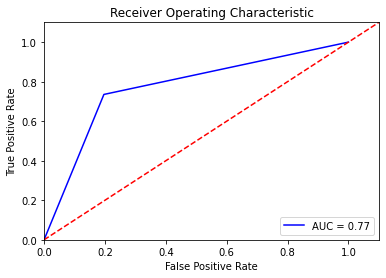

In [29]:
probs = voting_clf_soft.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred10)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Image Preprocessing for Testing**

In [117]:
test_folder1=r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/postest"
test_folder2=r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/negtest"

In [290]:
i=0
for filename in os.listdir(test_folder1):
    
    path=os.path.join(test_folder1,filename)    
    img = cv2.imread(path, 0)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((5,5),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernelx = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])
    kernely = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])

    img_sobelx = cv2.filter2D(img1, -1, kernelx)
    img_sobely = cv2.filter2D(img1, -1, kernely)

    grad = cv2.addWeighted(img_sobelx, 1, img_sobely, 1, 0)
    
    fname = r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/postest_p/' + str(i) + '.jpg'
    cv2.imwrite(fname, grad)
    i+=1

In [291]:
i=0
for filename in os.listdir(test_folder2):
    
    path=os.path.join(test_folder2,filename)    
    img = cv2.imread(path, 0)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((5,5),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    kernelx = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])
    kernely = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])

    img_sobelx = cv2.filter2D(img1, -1, kernelx)
    img_sobely = cv2.filter2D(img1, -1, kernely)

    grad = cv2.addWeighted(img_sobelx, 1, img_sobely, 1, 0)
    
    fname = r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/negtest_p/' + str(i) + '.jpg'
    cv2.imwrite(fname, grad)
    i+=1

# **TESTING**

In [33]:
test_folder3 = r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/postest_p"
test_folder4 = r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/negtest_p"
import pickle

In [7]:
#initialising i=0; as its the first class
i=0
ORB_data=[]
SURF_data = []

with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_Kmeans.sav", "rb") as input_file:
        ORB_kmeans = pickle.load(input_file)
with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_Kmeans.sav", "rb") as input_file:
        SURF_kmeans = pickle.load(input_file)
for filename in os.listdir(test_folder3):
    #path
    path=os.path.join(test_folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(800,500)
    img=cv2.resize(a,resize)
    
    #SURF feature extractor
    surf = cv2.xfeatures2d.SURF_create(800)
    keypoints, descriptors = surf.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
   
    array_double = np.array(out, dtype=np.double)
    
    a=SURF_kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
    SURF_data.append(hist[0]/len(keypoints))
    SURF_Output = pd.DataFrame(SURF_data)

    # ORB feature extractor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)

    a=ORB_kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
    ORB_data.append(hist[0]/len(keypoints))
    ORB_Output = pd.DataFrame(ORB_data)

    Output = pd.concat([ORB_Output,SURF_Output], axis=1)

#add row class 
Output["Class"] = i
csv_data=Output.to_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/Test_pos.csv', mode='a',header=False,index=False)

In [31]:
Output_pos = pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/Test_pos.csv',header=None)
Output_pos

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.136000,0.040000,0.028000,0.086000,0.144000,0.104000,0.080000,0.044000,0.060000,0.158000,...,0.074454,0.042350,0.066257,0.109973,0.189208,0.163251,0.038934,0.110656,0.062158,0
1,0.100000,0.074000,0.056000,0.082000,0.106000,0.104000,0.060000,0.108000,0.098000,0.090000,...,0.098415,0.091743,0.108424,0.045038,0.085071,0.096747,0.086739,0.067556,0.100917,0
2,0.092000,0.108000,0.102000,0.070000,0.104000,0.092000,0.072000,0.080000,0.082000,0.090000,...,0.051724,0.155172,0.058621,0.062069,0.179310,0.089655,0.068966,0.189655,0.037931,0
3,0.048780,0.101626,0.067073,0.093496,0.087398,0.060976,0.101626,0.113821,0.144309,0.040650,...,0.070093,0.172897,0.130841,0.028037,0.116822,0.051402,0.163551,0.093458,0.060748,0
4,0.042000,0.102000,0.040000,0.086000,0.096000,0.108000,0.106000,0.108000,0.138000,0.070000,...,0.103226,0.159140,0.098925,0.049462,0.055914,0.090323,0.159140,0.021505,0.126882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.074074,0.108796,0.074074,0.057870,0.094907,0.057870,0.087963,0.090278,0.192130,0.060185,...,0.047244,0.244094,0.015748,0.000000,0.204724,0.015748,0.094488,0.236220,0.023622,0
796,0.076000,0.082000,0.062000,0.054000,0.094000,0.080000,0.096000,0.078000,0.142000,0.122000,...,0.087393,0.053009,0.098854,0.054441,0.164756,0.075931,0.078797,0.183381,0.042980,0
797,0.080000,0.076000,0.102000,0.090000,0.082000,0.082000,0.096000,0.060000,0.104000,0.110000,...,0.056533,0.064070,0.051508,0.051508,0.222362,0.048995,0.045226,0.317839,0.054020,0
798,0.102000,0.092000,0.072000,0.068000,0.076000,0.102000,0.108000,0.072000,0.076000,0.122000,...,0.083256,0.058279,0.063830,0.058279,0.266420,0.105458,0.055504,0.132285,0.070305,0


In [11]:
#initialising i=1; as its the second class
i=1
ORB_data=[]
SURF_data = []

with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_Kmeans.sav", "rb") as input_file:
        ORB_kmeans = pickle.load(input_file)
with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_Kmeans.sav", "rb") as input_file:
        SURF_kmeans = pickle.load(input_file)
for filename in os.listdir(test_folder4):
    #path
    path=os.path.join(test_folder4,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(800,500)
    img=cv2.resize(a,resize)
    
    #SURF feature extractor
    surf = cv2.xfeatures2d.SURF_create(800)
    keypoints, descriptors = surf.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
   
    array_double = np.array(out, dtype=np.double)
    
    if (array_double.shape[0]  == 0 or array_double.shape[1]  == 0):
        array_double = np.zeros((1,128))
    a=SURF_kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
    if len(keypoints) == 0:
        for j in range(11):
            hist[0][j] = 0
        SURF_data.append(hist[0])
    else:
        SURF_data.append(hist[0]/len(keypoints))
    SURF_Output2 = pd.DataFrame(SURF_data)

    # ORB feature extractor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    # print("Descriptor Shape BRISK:",out.shape)

    array_double = np.array(out, dtype=np.double)
    if (array_double.shape[0]  == 0 or array_double.shape[1]  == 0):
        array_double = np.zeros((1,32))
    a=ORB_kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
    if len(keypoints) == 0:
        for k in range(11):
            hist[0][k] = 0
        ORB_data.append(hist[0])
    else:
        ORB_data.append(hist[0]/len(keypoints))

    ORB_Output2 = pd.DataFrame(ORB_data)

    Output1 = pd.concat([ORB_Output2,SURF_Output2], axis=1)

#add row class 
Output1["Class"] = i
csv_data=Output1.to_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/Test_neg.csv', mode='a',header=False,index=False)

In [32]:
Output_neg = pd.read_csv(r'C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/Test_neg.csv',header=None)
Output_neg

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.105381,0.065022,0.062780,0.091928,0.076233,0.112108,0.094170,0.085202,0.065022,0.177130,...,0.095420,0.059160,0.066794,0.127863,0.112595,0.141221,0.028626,0.049618,0.110687,1
1,0.048780,0.093126,0.190687,0.073171,0.077605,0.053215,0.082040,0.088692,0.110865,0.050998,...,0.144000,0.176000,0.112000,0.024000,0.128000,0.032000,0.112000,0.096000,0.072000,1
2,0.033755,0.151899,0.128692,0.054852,0.050633,0.069620,0.099156,0.111814,0.111814,0.065401,...,0.110410,0.072555,0.069401,0.044164,0.167192,0.056782,0.059937,0.230284,0.063091,1
3,0.122000,0.074000,0.064000,0.122000,0.070000,0.098000,0.104000,0.088000,0.068000,0.106000,...,0.092534,0.097792,0.087277,0.059937,0.213460,0.135647,0.048370,0.112513,0.052576,1
4,0.086000,0.074000,0.044000,0.092000,0.068000,0.110000,0.104000,0.146000,0.086000,0.092000,...,0.134409,0.075269,0.139785,0.033154,0.092294,0.071685,0.091398,0.049283,0.126344,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.068000,0.108000,0.066000,0.066000,0.098000,0.084000,0.104000,0.090000,0.100000,0.106000,...,0.091542,0.068657,0.092537,0.039801,0.139303,0.083582,0.057711,0.113433,0.081592,1
797,0.048000,0.100000,0.172000,0.060000,0.046000,0.068000,0.098000,0.106000,0.102000,0.060000,...,0.123862,0.169399,0.116576,0.025501,0.100182,0.052823,0.120219,0.065574,0.089253,1
798,0.112335,0.055066,0.189427,0.039648,0.079295,0.083700,0.079295,0.057269,0.041850,0.158590,...,0.112805,0.103659,0.048780,0.088415,0.179878,0.137195,0.070122,0.045732,0.085366,1
799,0.123431,0.098326,0.092050,0.108787,0.075314,0.054393,0.092050,0.087866,0.092050,0.083682,...,0.083151,0.109409,0.074398,0.039387,0.118162,0.107221,0.107221,0.063457,0.102845,1


In [34]:
A=Output_pos.append(Output_neg)
x = A.iloc[:,0:22].values
y = A.iloc[:,22].values
x,y

(array([[0.136     , 0.04      , 0.028     , ..., 0.03893443, 0.11065574,
         0.06215847],
        [0.1       , 0.074     , 0.056     , ..., 0.08673895, 0.0675563 ,
         0.10091743],
        [0.092     , 0.108     , 0.102     , ..., 0.06896552, 0.18965517,
         0.03793103],
        ...,
        [0.1123348 , 0.05506608, 0.18942731, ..., 0.07012195, 0.04573171,
         0.08536585],
        [0.12343096, 0.09832636, 0.09205021, ..., 0.10722101, 0.06345733,
         0.10284464],
        [0.048     , 0.1       , 0.108     , ..., 0.06628242, 0.21613833,
         0.09221902]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [35]:
x_scaled = standard(x)     #standardisation

In [36]:
pca = pickle.load(open("C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/PCA_Model_orbsurf.pkl",'rb'))
pca1 = pca.transform(x_scaled)
x_reduced = pd.DataFrame(pca1)
x_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.112781,3.131816,-0.460266,-0.868637,-0.098701,0.249300,-0.927886,-0.792130,-0.344094,-0.036507,-1.328968,0.359293,0.618517,0.511542,-0.448072,-0.080480,0.321939
1,-0.586548,-0.540899,-0.199282,-0.158955,-0.646653,-0.506944,-0.165095,-0.699508,-0.539486,-0.245151,-0.507036,-0.086619,0.342156,0.548343,0.057759,-0.289511,-0.398828
2,2.330424,1.692818,-0.332076,-0.044894,0.006346,0.235408,0.065278,-0.733020,-0.028944,0.169696,-0.256555,0.805345,0.030880,0.403405,0.149845,0.087880,-0.770086
3,2.162847,-2.020550,-0.868293,-0.037726,0.155521,0.262498,0.153372,-0.839946,0.649200,0.164386,-1.002635,0.953737,0.243314,0.081911,0.685363,0.404155,0.046861
4,-0.038681,-2.459128,-0.875542,0.677188,0.486031,-0.219901,-0.037992,-0.619513,0.369404,0.128219,-0.376659,1.424944,0.127845,0.324746,-0.005256,0.063492,0.086224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0.134926,0.262156,0.328678,-1.181550,-0.805507,-0.069408,0.042282,-0.493557,-0.479585,-0.523450,-0.295173,0.396600,-0.272052,0.500918,-0.945716,0.099649,-0.393473
1597,1.697735,-2.041418,1.321344,0.238927,-0.389966,0.591897,-0.372610,-0.432319,-0.113110,0.626073,-0.244919,0.745114,0.666805,-0.086460,0.206814,0.139015,-0.849661
1598,0.366881,1.522286,1.353851,0.582186,-0.186744,0.608569,-1.432647,0.603730,-0.396012,1.428963,-0.199486,0.664310,1.760340,-0.011549,-0.879112,-0.048360,0.073961
1599,0.516728,-0.390881,-0.229929,0.475029,-0.089649,0.311899,0.498144,0.173077,0.052113,-0.051163,-0.468436,-0.224827,0.945313,-0.169011,-0.731166,-0.297583,0.191353


In [37]:
B=pd.concat([x_reduced, pd.DataFrame(y)],axis=1)
data = B
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0
0,-1.112781,3.131816,-0.460266,-0.868637,-0.098701,0.249300,-0.927886,-0.792130,-0.344094,-0.036507,-1.328968,0.359293,0.618517,0.511542,-0.448072,-0.080480,0.321939,0
1,-0.586548,-0.540899,-0.199282,-0.158955,-0.646653,-0.506944,-0.165095,-0.699508,-0.539486,-0.245151,-0.507036,-0.086619,0.342156,0.548343,0.057759,-0.289511,-0.398828,0
2,2.330424,1.692818,-0.332076,-0.044894,0.006346,0.235408,0.065278,-0.733020,-0.028944,0.169696,-0.256555,0.805345,0.030880,0.403405,0.149845,0.087880,-0.770086,0
3,2.162847,-2.020550,-0.868293,-0.037726,0.155521,0.262498,0.153372,-0.839946,0.649200,0.164386,-1.002635,0.953737,0.243314,0.081911,0.685363,0.404155,0.046861,0
4,-0.038681,-2.459128,-0.875542,0.677188,0.486031,-0.219901,-0.037992,-0.619513,0.369404,0.128219,-0.376659,1.424944,0.127845,0.324746,-0.005256,0.063492,0.086224,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0.134926,0.262156,0.328678,-1.181550,-0.805507,-0.069408,0.042282,-0.493557,-0.479585,-0.523450,-0.295173,0.396600,-0.272052,0.500918,-0.945716,0.099649,-0.393473,1
1597,1.697735,-2.041418,1.321344,0.238927,-0.389966,0.591897,-0.372610,-0.432319,-0.113110,0.626073,-0.244919,0.745114,0.666805,-0.086460,0.206814,0.139015,-0.849661,1
1598,0.366881,1.522286,1.353851,0.582186,-0.186744,0.608569,-1.432647,0.603730,-0.396012,1.428963,-0.199486,0.664310,1.760340,-0.011549,-0.879112,-0.048360,0.073961,1
1599,0.516728,-0.390881,-0.229929,0.475029,-0.089649,0.311899,0.498144,0.173077,0.052113,-0.051163,-0.468436,-0.224827,0.945313,-0.169011,-0.731166,-0.297583,0.191353,1


In [38]:
x = data.iloc[:,0:17].values
y = data.iloc[:,17]

In [39]:
x,y

(array([[-1.112781  ,  3.13181595, -0.46026615, ..., -0.44807242,
         -0.08048025,  0.32193926],
        [-0.58654795, -0.54089852, -0.19928177, ...,  0.0577591 ,
         -0.2895108 , -0.3988277 ],
        [ 2.33042387,  1.69281812, -0.3320756 , ...,  0.14984525,
          0.08787989, -0.77008558],
        ...,
        [ 0.36688068,  1.52228556,  1.35385107, ..., -0.87911158,
         -0.04835981,  0.0739609 ],
        [ 0.51672843, -0.39088134, -0.22992915, ..., -0.73116642,
         -0.29758301,  0.1913529 ],
        [ 3.22960587, -0.93833933, -1.00638966, ...,  0.23472875,
          0.04938319, -1.79696183]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1596    1
 1597    1
 1598    1
 1599    1
 1600    1
 Name: 0, Length: 1601, dtype: int64)

# **Decision Tree Testing results**

In [40]:
test_y_pred1 = model1.predict(x)
print("Decision Tree Test Results")
print("Test Accuracy:",model1.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred1))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred1).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred1))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred1))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred1))
print("Mean Squred Error",mean_squared_error(y, test_y_pred1))

Decision Tree Test Results
Test Accuracy: 0.5865084322298564
Confusion Matrix: 
[[509 291]
 [371 430]]
+ve Precision: 0.5963938973647711
-ve Precision: 0.5784090909090909
+ve Recall: 0.5368289637952559
-ve Recall: 0.63625
+ve F1 Score: 0.5650459921156373
-ve F1 Score: 0.6059523809523809


Sensitivity 0.5368289637952559
Specificity: 0.63625
Overall Precision Score:  0.5963938973647711
Overall Recall Score:  0.5368289637952559
Overall F1 Score:  0.5650459921156373
Mean Squred Error 0.4134915677701437


Area under Curve: 0.586539481897628


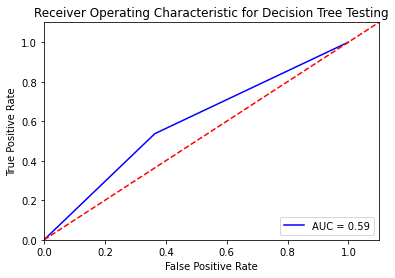

In [41]:
probs = model1.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred1)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Decision Tree Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Random Forest Testing results**

In [42]:
test_y_pred2 = model2.predict(x)
print("Random Forest Test Results")
print("Test Accuracy:",model2.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred2))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred2).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred2))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred2))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred2))
print("Mean Squred Error",mean_squared_error(y, test_y_pred2))

Random Forest Test Results
Test Accuracy: 0.6208619612742037
Confusion Matrix: 
[[629 171]
 [436 365]]
+ve Precision: 0.6809701492537313
-ve Precision: 0.5906103286384976
+ve Recall: 0.4556803995006242
-ve Recall: 0.78625
+ve F1 Score: 0.5459985041136872
-ve F1 Score: 0.6745308310991958


Sensitivity 0.4556803995006242
Specificity: 0.78625
Overall Precision Score:  0.6809701492537313
Overall Recall Score:  0.4556803995006242
Overall F1 Score:  0.5459985041136872
Mean Squred Error 0.3791380387257964


Area under Curve: 0.6209651997503122


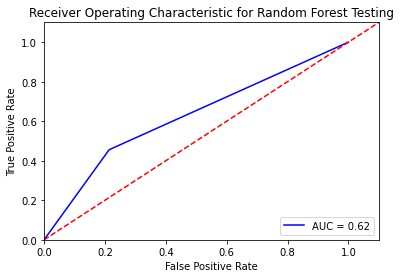

In [43]:
probs = model2.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred2)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **KNN Testing results**

In [44]:
test_y_pred3 = model3.predict(x)
print("KNN Testing Results")
print("Test Accuracy:",model3.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred3))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred3).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred3))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred3))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred3))
print("Mean Squred Error",mean_squared_error(y, test_y_pred3))

KNN Testing Results
Test Accuracy: 0.603372891942536
Confusion Matrix: 
[[488 312]
 [323 478]]
+ve Precision: 0.6050632911392405
-ve Precision: 0.6017262638717632
+ve Recall: 0.5967540574282147
-ve Recall: 0.61
+ve F1 Score: 0.6008799497171591
-ve F1 Score: 0.6058348851644941


Sensitivity 0.5967540574282147
Specificity: 0.61
Overall Precision Score:  0.6050632911392405
Overall Recall Score:  0.5967540574282147
Overall F1 Score:  0.6008799497171591
Mean Squred Error 0.3966271080574641


Area under Curve: 0.6033770287141074


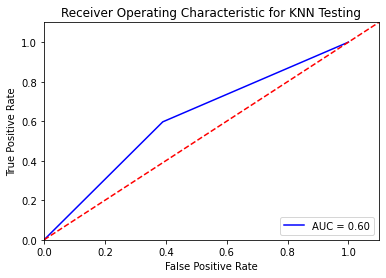

In [45]:
probs = model3.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred3)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for KNN Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **SVM Linear Testing Results**




In [46]:
test_y_pred4 = model4.predict(x)
print("SVM Linear Testing Results")
print("Test Accuracy:",model4.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred4))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred4).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred4))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred4))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred4))
print("Mean Squred Error",mean_squared_error(y, test_y_pred4))

SVM Linear Testing Results
Test Accuracy: 0.6164896939412867
Confusion Matrix: 
[[620 180]
 [434 367]]
+ve Precision: 0.6709323583180987
-ve Precision: 0.5882352941176471
+ve Recall: 0.4581772784019975
-ve Recall: 0.775
+ve F1 Score: 0.5445103857566765
-ve F1 Score: 0.668824163969795


Sensitivity 0.4581772784019975
Specificity: 0.775
Overall Precision Score:  0.6709323583180987
Overall Recall Score:  0.4581772784019975
Overall F1 Score:  0.5445103857566765
Mean Squred Error 0.3835103060587133


Area under Curve: 0.6165886392009987


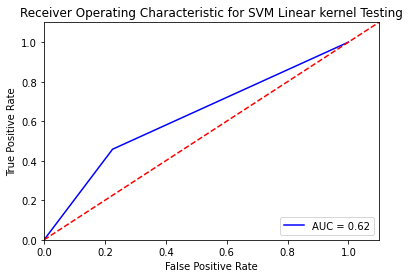

In [47]:
probs = model4.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred4)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for SVM Linear kernel Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**SVM Polynomial Testing results**




In [48]:
test_y_pred5 = model5.predict(x)
print("SVM Polynomial kernel Testing Results")
print("Test Accuracy:",model5.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred5))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred5).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred5))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred5))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred5))
print("Mean Squred Error",mean_squared_error(y, test_y_pred5))

SVM Polynomial kernel Testing Results
Test Accuracy: 0.6083697688944409
Confusion Matrix: 
[[695 105]
 [522 279]]
+ve Precision: 0.7265625
-ve Precision: 0.571076417419885
+ve Recall: 0.34831460674157305
-ve Recall: 0.86875
+ve F1 Score: 0.4708860759493671
-ve F1 Score: 0.6891422905304909


Sensitivity 0.34831460674157305
Specificity: 0.86875
Overall Precision Score:  0.7265625
Overall Recall Score:  0.34831460674157305
Overall F1 Score:  0.4708860759493671
Mean Squred Error 0.391630231105559


Area under Curve: 0.6085323033707866


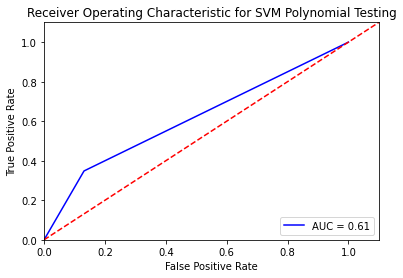

In [49]:
probs = model5.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred5)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for SVM Polynomial Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **SVM Rbf Testing results**





In [50]:
test_y_pred6 = model6.predict(x)
print("SVM Rbf kernel Testing Results")
print("Test Accuracy:",model6.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred6))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred6).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred6))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred6))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred6))
print("Mean Squred Error",mean_squared_error(y, test_y_pred6))

SVM Rbf kernel Testing Results
Test Accuracy: 0.6358525921299188
Confusion Matrix: 
[[599 201]
 [382 419]]
+ve Precision: 0.6758064516129032
-ve Precision: 0.6106014271151886
+ve Recall: 0.5230961298377028
-ve Recall: 0.74875
+ve F1 Score: 0.58972554539057
-ve F1 Score: 0.6726558113419427


Sensitivity 0.5230961298377028
Specificity: 0.74875
Overall Precision Score:  0.6758064516129032
Overall Recall Score:  0.5230961298377028
Overall F1 Score:  0.58972554539057
Mean Squred Error 0.3641474078700812


Area under Curve: 0.6359230649188514


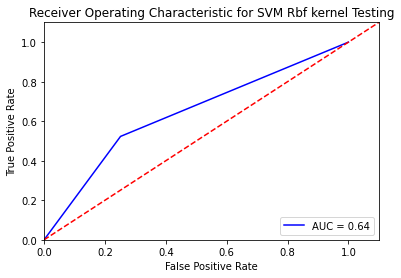

In [51]:
probs = model6.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred6)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for SVM Rbf kernel Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Logistic Regression Testing results**

In [52]:
test_y_pred7 = model7.predict(x)
print("Logistic Regression Testing Results")
print("Test Accuracy:",model7.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred7))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred7).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred7))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred7))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred7))
print("Mean Squred Error",mean_squared_error(y, test_y_pred7))

Logistic Regression Testing Results
Test Accuracy: 0.617738913179263
Confusion Matrix: 
[[594 206]
 [406 395]]
+ve Precision: 0.6572379367720466
-ve Precision: 0.594
+ve Recall: 0.49313358302122345
-ve Recall: 0.7425
+ve F1 Score: 0.5634807417974322
-ve F1 Score: 0.66


Sensitivity 0.49313358302122345
Specificity: 0.7425
Overall Precision Score:  0.6572379367720466
Overall Recall Score:  0.49313358302122345
Overall F1 Score:  0.5634807417974322
Mean Squred Error 0.38226108682073706


Area under Curve: 0.6178167915106118


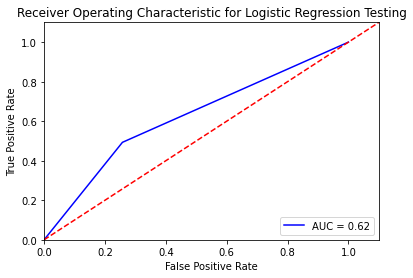

In [53]:
probs = model7.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred7)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Logistic Regression Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **XG Boost Testing results**

In [54]:
test_y_pred8 = model8.predict(x)
print("XG-Boost Classifier Results")
print("Test Accuracy:",model8.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred8))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred8).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred8))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred8))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred8))
print("Mean Squred Error",mean_squared_error(y, test_y_pred8))

XG-Boost Classifier Results
Test Accuracy: 0.6102435977514054
Confusion Matrix: 
[[665 135]
 [489 312]]
+ve Precision: 0.697986577181208
-ve Precision: 0.5762564991334489
+ve Recall: 0.3895131086142322
-ve Recall: 0.83125
+ve F1 Score: 0.5
-ve F1 Score: 0.6806550665301945


Sensitivity 0.3895131086142322
Specificity: 0.83125
Overall Precision Score:  0.697986577181208
Overall Recall Score:  0.3895131086142322
Overall F1 Score:  0.5
Mean Squred Error 0.38975640224859465


Area under Curve: 0.6103815543071162


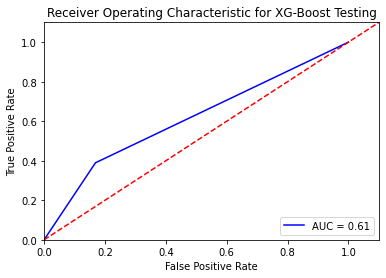

In [55]:
probs = model8.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred8)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for XG-Boost Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Naive Bayes Testing Results**

In [56]:
test_y_pred9 = model9.predict(x)
print("Naive Bayes Test Results")
print("Test Accuracy:",model9.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred9))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred9).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred9))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred9))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred9))
print("Mean Squred Error",mean_squared_error(y, test_y_pred9))

Naive Bayes Test Results
Test Accuracy: 0.5940037476577139
Confusion Matrix: 
[[639 161]
 [489 312]]
+ve Precision: 0.6596194503171248
-ve Precision: 0.5664893617021277
+ve Recall: 0.3895131086142322
-ve Recall: 0.79875
+ve F1 Score: 0.489795918367347
-ve F1 Score: 0.6628630705394191


Sensitivity 0.3895131086142322
Specificity: 0.79875
Overall Precision Score:  0.6596194503171248
Overall Recall Score:  0.3895131086142322
Overall F1 Score:  0.489795918367347
Mean Squred Error 0.4059962523422861


Area under Curve: 0.5941315543071162


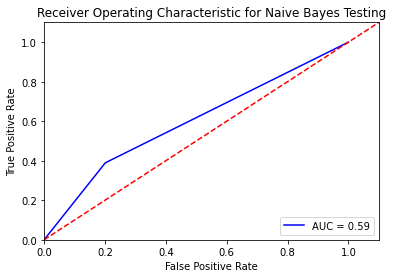

In [57]:
probs = model9.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred9)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Naive Bayes Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#**Voting Classifier**

In [58]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(estimators=[ ('dt', model1), ('rf', model2), ('knn', model3),('svm_l', model4),
                                               ('svm_p', model5),('svm_r', model6),('lr',model7), ('XGB',model8), ('GNB', model9)],voting='soft')

In [59]:
voting_clf_soft.fit(x, y)
test_y_pred10 = voting_clf_soft.predict(x)
print("Soft Voting Classfier results")
print("Test Accuracy:",voting_clf_soft.score(x, y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred10))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred10).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred10))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred10))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred10))
print("Mean Squred Error",mean_squared_error(y, test_y_pred10))

C:\Users\rachn\anaconda3\envs\mytest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Soft Voting Classfier results
Test Accuracy: 0.8794503435352904
Confusion Matrix: 
[[746  54]
 [139 662]]
+ve Precision: 0.9245810055865922
-ve Precision: 0.8429378531073446
+ve Recall: 0.8264669163545568
-ve Recall: 0.9325
+ve F1 Score: 0.8727752142386289
-ve F1 Score: 0.885459940652819


Sensitivity 0.8264669163545568
Specificity: 0.9325
Overall Precision Score:  0.9245810055865922
Overall Recall Score:  0.8264669163545568
Overall F1 Score:  0.8727752142386289
Mean Squred Error 0.12054965646470955


Area under Curve: 0.8794834581772785


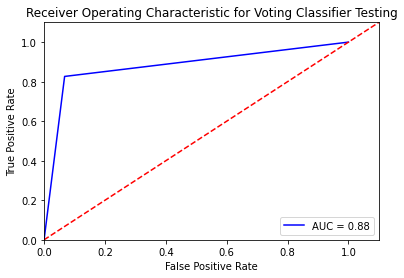

In [60]:
probs = voting_clf_soft.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred10)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Voting Classifier Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# **Individual Image prediction**


# **Positive Image**

In [326]:
import pickle 

ORB_data=[]
SURF_data = []
path=r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/Positives/323.jpg"

#Image Preprocessing
a=cv2.imread(path, 0)
resize=(800,500)
img=cv2.resize(a,resize)

kernel = np.ones((3,3),dtype = 'uint8')/9 #low pass filter
img1 = cv2.filter2D(img,-1,kernel)
    
kernelx = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
kernely = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

img_sobelx = cv2.filter2D(img1, -1, kernelx)
img_sobely = cv2.filter2D(img1, -1, kernely)

grad = cv2.addWeighted(img_sobelx, 1, img_sobely, 1, 0)

#ORB feature extractor
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(grad, None)
out=pd.DataFrame(descriptors)
print("Descriptor Shape ORB:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_Kmeans.sav", "rb") as input_file:
    ORB_kmeans = pickle.load(input_file)
    
a=ORB_kmeans.predict(array_double)
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
ORB_data.append(hist[0]/len(keypoints))
ORB_Output = pd.DataFrame(ORB_data)

# SURF feature extractor
surf = cv2.xfeatures2d.SURF_create(800)
keypoints, descriptors = surf.detectAndCompute(grad, None)
out=pd.DataFrame(descriptors)
print("Descriptor Shape SURF:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_Kmeans.sav", "rb") as input_file:
    SURF_kmeans = pickle.load(input_file)
    
a=SURF_kmeans.predict(array_double)
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
SURF_data.append(hist[0]/len(keypoints))
SURF_Output = pd.DataFrame(SURF_data)

Output = pd.concat([ORB_Output,SURF_Output], axis=1)

Output = Output.iloc[:,0:22].values
print("Histogram:\n",Output)

sf = standard(Output)
pca1 = pca.transform(sf)
y_pred1 = model6.predict(pca1)
print('Predicted Class:', y_pred1)
if (y_pred1 == 1):
  print("The road is straight")
else:
  print("The road is curved")

Descriptor Shape ORB: (500, 32)
Descriptor Shape SURF: (344, 64)
Histogram:
 [[0.084      0.078      0.04       0.064      0.082      0.086
  0.062      0.124      0.098      0.158      0.124      0.04069767
  0.11046512 0.09011628 0.09011628 0.09302326 0.05232558 0.13953488
  0.0755814  0.07848837 0.15988372 0.06976744]]
Predicted Class: [0]
The road is curved


# **Negative Image**

In [333]:
import pickle 

ORB_data=[]
SURF_data = []
path=r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/Negatives/1321.jpg"

#Image Preprocessing
a=cv2.imread(path, 0)
resize=(800,500)
img=cv2.resize(a,resize)

kernel = np.ones((3,3),dtype = 'uint8')/9 #low pass filter
img1 = cv2.filter2D(img,-1,kernel)
    
kernelx = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
kernely = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

img_sobelx = cv2.filter2D(img1, -1, kernelx)
img_sobely = cv2.filter2D(img1, -1, kernely)

grad = cv2.addWeighted(img_sobelx, 1, img_sobely, 1, 0)

#ORB feature extractor
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(grad, None)
out=pd.DataFrame(descriptors)
print("Descriptor Shape ORB:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/ORB_Kmeans.sav", "rb") as input_file:
    ORB_kmeans = pickle.load(input_file)
    
a=ORB_kmeans.predict(array_double)
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
ORB_data.append(hist[0]/len(keypoints))
ORB_Output = pd.DataFrame(ORB_data)

# SURF feature extractor
surf = cv2.xfeatures2d.SURF_create(800)
keypoints, descriptors = surf.detectAndCompute(grad, None)
out=pd.DataFrame(descriptors)
print("Descriptor Shape SURF:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"C:/Users/rachn/OneDrive/Documents/COLLEGE/Third Year/computer vision/SURF_Kmeans.sav", "rb") as input_file:
    SURF_kmeans = pickle.load(input_file)
    
a=SURF_kmeans.predict(array_double)
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11])
SURF_data.append(hist[0]/len(keypoints))
SURF_Output = pd.DataFrame(SURF_data)

Output = pd.concat([ORB_Output,SURF_Output], axis=1)

Output = Output.iloc[:,0:22].values
print("Histogram:\n",Output)

sf = standard(Output)
pca1 = pca.transform(sf)
y_pred1 = model6.predict(pca1)
print('Predicted Class:', y_pred1)
if (y_pred1 == 1):
  print("The road is straight")

else:
  print("The road is curved")


Descriptor Shape ORB: (429, 32)
Descriptor Shape SURF: (34, 64)
Histogram:
 [[0.14685315 0.12587413 0.05827506 0.05128205 0.07226107 0.06060606
  0.05827506 0.10955711 0.15151515 0.08857809 0.07692308 0.
  0.         0.08823529 0.14705882 0.14705882 0.08823529 0.05882353
  0.05882353 0.17647059 0.17647059 0.05882353]]
Predicted Class: [1]
The road is straight
